In [1]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from linage import get_lineage_coll
from resistance import get_resistance_snp

In [2]:
def import_VCF42_to_pandas(vcf_file, sep='\t'):
    header_lines = 0
    with open(vcf_file) as f:
        first_line = f.readline().strip()
        next_line = f.readline().strip()
        while next_line.startswith("##"):
            header_lines = header_lines + 1
            #print(next_line)
            next_line = f.readline()
    
    if first_line.endswith('VCFv4.2'):
        
        #Use first line as header
        dataframe = pd.read_csv(vcf_file, sep=sep, skiprows=[header_lines], header=header_lines)
        sample = dataframe.columns[-1]
        dataframe.rename(columns={sample:'sample'}, inplace=True)
        
        for index in dataframe.index:
            info_fields = re.findall(r';*([a-zA-Z]{1,20})=', dataframe.loc[index,'INFO'])
            info_values = re.findall(r'-?\d+\.?\d*e?[+-]?\d{0,2}', dataframe.loc[index,'INFO'])
            
            format_fields = dataframe.loc[index,'FORMAT'].split(":")
            format_values = dataframe.loc[index,'sample'].split(":")
                                    
            for ifield, ivalue in zip(info_fields,info_values):
                dataframe.loc[index,ifield] = ivalue
                
            for ffield, fvalue in zip(format_fields,format_values):
                dataframe.loc[index,ffield] = fvalue
            #if len(format_values[1].split(",")) != 2:
            #    print(format_values[1].split(","), index)
            #    print(dataframe.iloc[index])
        dataframe.rename(columns={'AF':'af'}, inplace=True)
        dataframe['REF_AD'] = dataframe['AD'].str.split(",").str[-2:].str[0]
        dataframe['ALT_AD'] = dataframe['AD'].str.split(",").str[-2:].str[1]
        
        to_float = ['POS', 'QUAL', 'AC', 'af', 'AN', 'BaseQRankSum', 'DP', 'ExcessHet', 'FS',
       'MLEAC', 'MLEAF', 'MQ', 'MQRankSum', 'QD', 'ReadPosRankSum', 'SOR','GQ','ALT_AD', 'REF_AD']
        
        for column in dataframe.columns:
            if column in to_float:
                dataframe[column] = dataframe[column].astype(float)
        
        dataframe['aF'] = dataframe['REF_AD']/dataframe['DP']
        dataframe['AF'] = dataframe['ALT_AD']/dataframe['DP']

                
    else:
        print("This vcf file is not v4.2")
        sys.exit(1)
           
    return dataframe

In [66]:
vcf_1 = 'test/1mixed.snp.hf.vcf'
vcf_2 = 'test/2mixed.snp.hf.vcf'
vcf_3 = 'test/3mixed.snp.hf.vcf'
vcf_4 = 'test/4mixed.snp.hf.vcf'
vcf_5 = 'test/5mixed.snp.hf.vcf'
vcf_6 = 'test/6mixed.snp.hf.vcf'
vcf_files = [vcf_1, vcf_2, vcf_3, vcf_4, vcf_5, vcf_6]

#reference="data/MTB_ancestorII_reference.fas"

#fasta_to_replace = SeqIO.read(reference,"fasta")

sample_list = ["1", "2", "3", "4", "5", "6"]
sample_list_df_name = [sample + "_df" for sample in sample_list]

dict_df = {}
for vcf, df_name in zip(vcf_files, sample_list_df_name):
    dict_df[df_name] = import_VCF42_to_pandas(vcf)
    
#P150_df = import_VCF4_to_pandas(vcf_P150)
#P180_df = import_VCF4_to_pandas(vcf_P180)
#P190_df = import_VCF4_to_pandas(vcf_P190)


#new_reference_seq = replace_fasta_sequence(reference,P150_df['REF'],P150_df['ALT'],P150_df['POS'])
#new_reference_id = "%s_%s" % (fasta_to_replace.id, sample_name)

#Output_new_reference = "Ancestor_PAIR15050.fasta"

#Create seqIO object
#new_reference = SeqRecord(Seq(new_reference_seq), id = new_reference_id, description = "")


#with open(Output_new_reference, "w") as output_handle:
#    SeqIO.write(new_reference, output_handle, "fasta")
#df_1 = import_VCF4_to_pandas(vcf_1)

In [67]:
print(sample_list_df_name)
print(vcf_files)

['1_df', '2_df', '3_df', '4_df', '5_df', '6_df']
['test/1mixed.snp.hf.vcf', 'test/2mixed.snp.hf.vcf', 'test/3mixed.snp.hf.vcf', 'test/4mixed.snp.hf.vcf', 'test/5mixed.snp.hf.vcf', 'test/6mixed.snp.hf.vcf']


In [68]:
#print(fasta_to_replace.seq[0:41])

In [69]:
#print(new_reference_seq[0:41])

In [70]:
dict_df["1_df"].head(10)

#CHROM      POS ID REF ALT     QUAL FILTER  \
0  MTB_anc   2532.0  .   C   T   921.03   PASS   
1  MTB_anc   8049.0  .   T   G  1319.60   PASS   
2  MTB_anc   8688.0  .   G   T   784.60   PASS   
3  MTB_anc   9143.0  .   C   T  3478.03   PASS   
4  MTB_anc   9841.0  .   C   T  1034.60   PASS   
5  MTB_anc   9944.0  .   A   C   706.60   PASS   
6  MTB_anc  12833.0  .   C   G  1372.60   PASS   
7  MTB_anc  13460.0  .   G   A  1933.03   PASS   
8  MTB_anc  13965.0  .   C   G   592.60   PASS   
9  MTB_anc  14401.0  .   G   A  3387.03   PASS   

                                                INFO          FORMAT  \
0  AC=2;AF=1.00;AN=2;DP=29;ExcessHet=3.0103;FS=0....  GT:AD:DP:GQ:PL   
1  AC=1;AF=0.500;AN=2;BaseQRankSum=0.873;DP=74;Ex...  GT:AD:DP:GQ:PL   
2  AC=1;AF=0.500;AN=2;BaseQRankSum=1.87;DP=73;Exc...  GT:AD:DP:GQ:PL   
3  AC=2;AF=1.00;AN=2;DP=106;ExcessHet=3.0103;FS=0...  GT:AD:DP:GQ:PL   
4  AC=1;AF=0.500;AN=2;BaseQRankSum=0.148;DP=121;E...  GT:AD:DP:GQ:PL   
5  AC=1;AF=0.500;AN=2;BaseQRankSum=0.638;DP=92;Ex...  GT:AD:DP:GQ:PL   
6  AC=1;AF=0.500;AN=2;BaseQRankSum=1.64;DP=65;Exc...  GT:AD:DP:GQ:PL   
7  AC=2;AF=1.00;AN=2;DP=66;ExcessHet=3.0103;FS=0....  GT:AD:DP:GQ:PL   
8  AC=1;AF=0.500;AN=2;BaseQRankSum=1.11;DP=58;Exc...  GT:AD:DP:GQ:PL   
9  AC=2;AF=1.00;AN=2;DP=101;ExcessHet=3.0103;FS=0...  GT:AD:DP:GQ:PL   

                         sample  ...  BaseQRankSum  MQRankSum  ReadPosRankSum  \
0       1/1:0,29:29:87:935,87,0  ...           NaN        NaN             NaN   
1    0/1:30,44:74:99:1327,0,793  ...         0.873        0.0          -0.149   
2    0/1:45,28:73:99:792,0,1301  ...         1.870        0.0          -0.562   
3   1/1:0,106:106:99:3492,318,0  ...           NaN        NaN             NaN   
4  0/1:77,44:121:99:1042,0,2063  ...         0.148        0.0          -1.976   
5    0/1:62,30:92:99:714,0,1791  ...         0.638        0.0           0.104   
6    0/1:19,46:65:99:1380,0,390  ...         1.640        0.0          -0.577   
7     1/1:0,65:65:99:1947,192,0  ...           NaN        NaN             NaN   
8     0/1:32,26:58:99:600,0,681  ...         1.110        0.0          -0.227   
9   1/1:0,101:101:99:3401,302,0  ...           NaN        NaN             NaN   

   PGT  PID   PS  REF_AD  ALT_AD        aF        AF  
0  NaN  NaN  NaN     0.0    29.0  0.000000  1.000000  
1  NaN  NaN  NaN    30.0    44.0  0.405405  0.594595  
2  NaN  NaN  NaN    45.0    28.0  0.616438  0.383562  
3  NaN  NaN  NaN     0.0   106.0  0.000000  1.000000  
4  NaN  NaN  NaN    77.0    44.0  0.636364  0.363636  
5  NaN  NaN  NaN    62.0    30.0  0.673913  0.326087  
6  NaN  NaN  NaN    19.0    46.0  0.292308  0.707692  
7  NaN  NaN  NaN     0.0    65.0  0.000000  1.000000  
8  NaN  NaN  NaN    32.0    26.0  0.551724  0.448276  
9  NaN  NaN  NaN     0.0   101.0  0.000000  1.000000  

[10 rows x 35 columns]

In [71]:
dict_df["1_df"].dtypes

#CHROM             object
POS               float64
ID                 object
REF                object
ALT                object
QUAL              float64
FILTER             object
INFO               object
FORMAT             object
sample             object
AC                float64
af                float64
AN                float64
DP                float64
ExcessHet         float64
FS                float64
MLEAC             float64
MLEAF             float64
MQ                float64
QD                float64
SOR               float64
GT                 object
AD                 object
GQ                float64
PL                 object
BaseQRankSum      float64
MQRankSum         float64
ReadPosRankSum    float64
PGT                object
PID                object
PS                 object
REF_AD            float64
ALT_AD            float64
aF                float64
AF                float64
dtype: object

In [72]:
dict_df["1_df"].head(5)

#CHROM     POS ID REF ALT     QUAL FILTER  \
0  MTB_anc  2532.0  .   C   T   921.03   PASS   
1  MTB_anc  8049.0  .   T   G  1319.60   PASS   
2  MTB_anc  8688.0  .   G   T   784.60   PASS   
3  MTB_anc  9143.0  .   C   T  3478.03   PASS   
4  MTB_anc  9841.0  .   C   T  1034.60   PASS   

                                                INFO          FORMAT  \
0  AC=2;AF=1.00;AN=2;DP=29;ExcessHet=3.0103;FS=0....  GT:AD:DP:GQ:PL   
1  AC=1;AF=0.500;AN=2;BaseQRankSum=0.873;DP=74;Ex...  GT:AD:DP:GQ:PL   
2  AC=1;AF=0.500;AN=2;BaseQRankSum=1.87;DP=73;Exc...  GT:AD:DP:GQ:PL   
3  AC=2;AF=1.00;AN=2;DP=106;ExcessHet=3.0103;FS=0...  GT:AD:DP:GQ:PL   
4  AC=1;AF=0.500;AN=2;BaseQRankSum=0.148;DP=121;E...  GT:AD:DP:GQ:PL   

                         sample  ...  BaseQRankSum  MQRankSum  ReadPosRankSum  \
0       1/1:0,29:29:87:935,87,0  ...           NaN        NaN             NaN   
1    0/1:30,44:74:99:1327,0,793  ...         0.873        0.0          -0.149   
2    0/1:45,28:73:99:792,0,1301  ...         1.870        0.0          -0.562   
3   1/1:0,106:106:99:3492,318,0  ...           NaN        NaN             NaN   
4  0/1:77,44:121:99:1042,0,2063  ...         0.148        0.0          -1.976   

   PGT  PID   PS  REF_AD  ALT_AD        aF        AF  
0  NaN  NaN  NaN     0.0    29.0  0.000000  1.000000  
1  NaN  NaN  NaN    30.0    44.0  0.405405  0.594595  
2  NaN  NaN  NaN    45.0    28.0  0.616438  0.383562  
3  NaN  NaN  NaN     0.0   106.0  0.000000  1.000000  
4  NaN  NaN  NaN    77.0    44.0  0.636364  0.363636  

[5 rows x 35 columns]

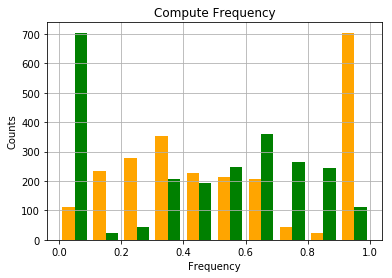

In [73]:
x = dict_df["1_df"]['AF']
reference = 1 - dict_df["1_df"]['AF']

plt.xlabel('Frequency')
plt.ylabel('Counts')
plt.title('Compute Frequency')
plt.grid(True)

plt.hist([x, reference], color=['orange', 'green']) 
plt.show()

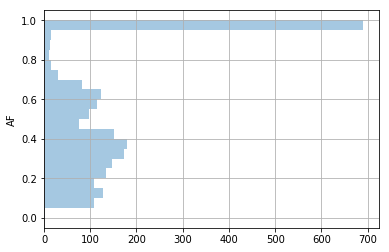

In [117]:
x = dict_df["1_df"]['AF']
espejo = 1 - dict_df["1_df"]['AF']

sns.distplot(x, kde=False, rug=False, bins=int(20), vertical=True)
plt.grid(True)
#sns.distplot(espejo, kde=False, rug=False)

In [75]:
dict_df["1_df"]['AF'].mean(axis = 0) 

0.5597808806751288

In [76]:
def scatter_vcf(vcf_df):
    filter_value = 0.98
    y = vcf_df['AF'][vcf_df['AF'] < filter_value]
    x = vcf_df['AF'][vcf_df['AF'] < filter_value].index.values
    
    mean = vcf_df['AF'].mean(axis = 0)
    
    col_mean = np.where(vcf_df['AF'][vcf_df['AF'] < filter_value] > mean,'c','r')
    
    plt.figure(figsize=(50,20))
    plt.margins(x=0.01, y=0.01, tight=True)

    plt.xlabel('Frequency')
    plt.ylabel('Counts')
    plt.title('Compute Frequency')
    plt.grid(True)
    

    plt.scatter(x, y, color=col_mean, alpha=0.9, s=200) # colormap='jet'
    plt.show()
    

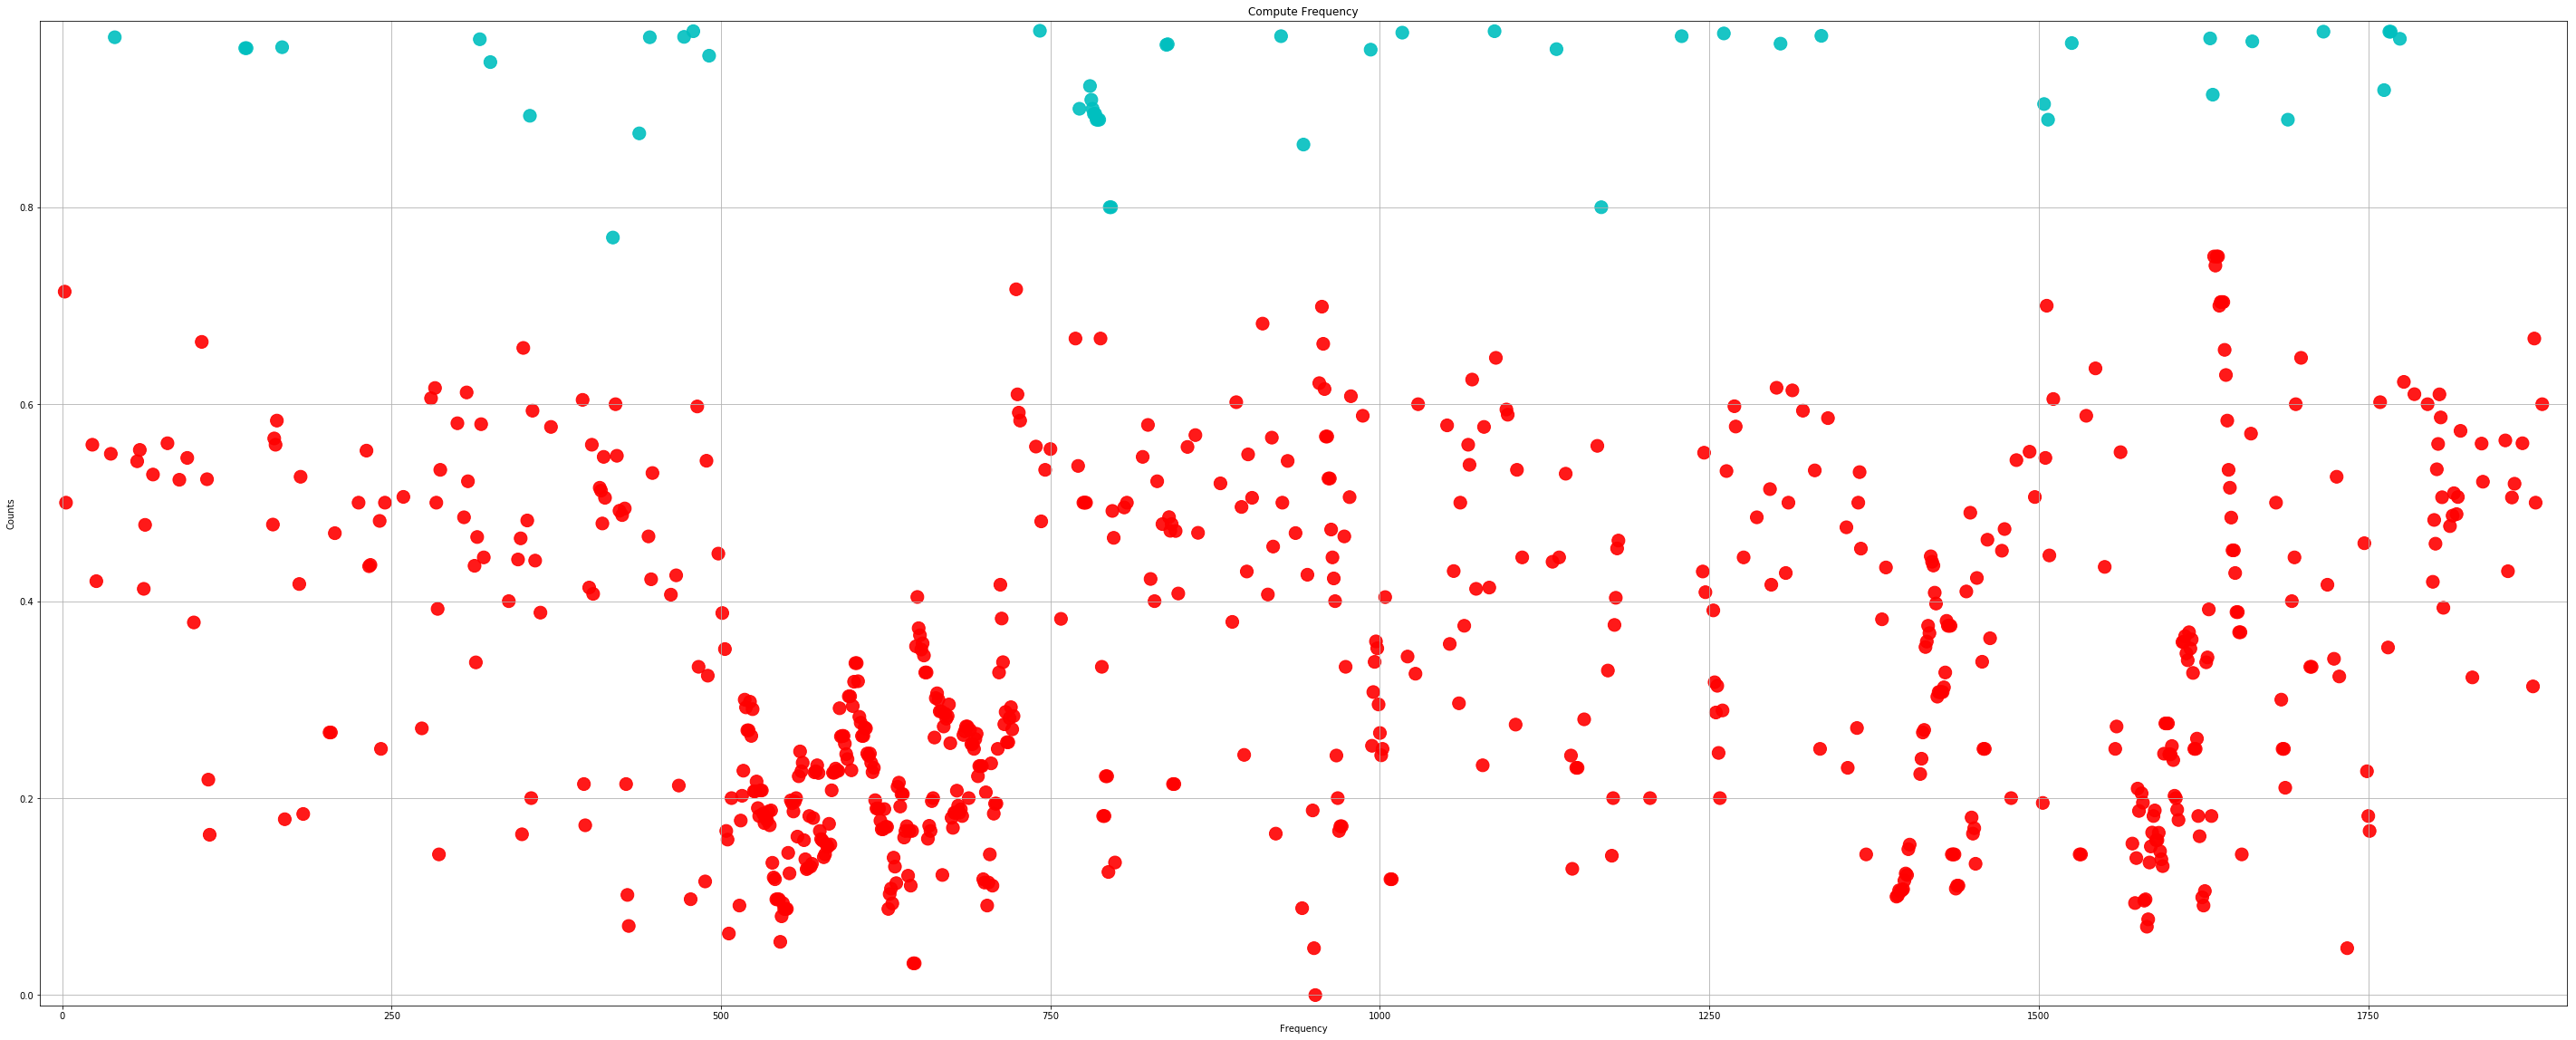

In [77]:
scatter_vcf(dict_df["5_df"])

# FILTER REPEATS

In [78]:
list_positions = []
with open("data/repeats_annot.coords.tab") as f:
    for _ in range(1):
        next(f)
    for line in f:
        split_line = line.strip().split("\t")
        expression = "((row['POS'] >= %s) & (row['POS'] <= %s))" % (split_line[0], split_line[1])
        list_positions.append(expression)
print("(" + "|".join(list_positions) + ")")

(((row['POS'] >= 33582 ) & (row['POS'] <=  33794))|((row['POS'] >= 103710 ) & (row['POS'] <=  104663))|((row['POS'] >= 104805 ) & (row['POS'] <=  105215))|((row['POS'] >= 105324 ) & (row['POS'] <=  106715))|((row['POS'] >= 131382 ) & (row['POS'] <=  132872))|((row['POS'] >= 149533 ) & (row['POS'] <=  150996))|((row['POS'] >= 177543 ) & (row['POS'] <=  179309))|((row['POS'] >= 179319 ) & (row['POS'] <=  180896))|((row['POS'] >= 187433 ) & (row['POS'] <=  188839))|((row['POS'] >= 188931 ) & (row['POS'] <=  190439))|((row['POS'] >= 307877 ) & (row['POS'] <=  309547))|((row['POS'] >= 333437 ) & (row['POS'] <=  336310))|((row['POS'] >= 336560 ) & (row['POS'] <=  339073))|((row['POS'] >= 339364 ) & (row['POS'] <=  340974))|((row['POS'] >= 349624 ) & (row['POS'] <=  349932))|((row['POS'] >= 349935 ) & (row['POS'] <=  351476))|((row['POS'] >= 361334 ) & (row['POS'] <=  363109))|((row['POS'] >= 366150 ) & (row['POS'] <=  372764))|((row['POS'] >= 372820 ) & (row['POS'] <=  375711))|((row['POS'] 

In [79]:
def filter_repeats(row):
    if ((row['POS'] >= 33582 ) & (row['POS'] <=  33794))|((row['POS'] >= 103710 ) & (row['POS'] <=  104663))|((row['POS'] >= 104805 ) & (row['POS'] <=  105215))|((row['POS'] >= 105324 ) & (row['POS'] <=  106715))|((row['POS'] >= 131382 ) & (row['POS'] <=  132872))|((row['POS'] >= 149533 ) & (row['POS'] <=  150996))|((row['POS'] >= 177543 ) & (row['POS'] <=  179309))|((row['POS'] >= 179319 ) & (row['POS'] <=  180896))|((row['POS'] >= 187433 ) & (row['POS'] <=  188839))|((row['POS'] >= 188931 ) & (row['POS'] <=  190439))|((row['POS'] >= 307877 ) & (row['POS'] <=  309547))|((row['POS'] >= 333437 ) & (row['POS'] <=  336310))|((row['POS'] >= 336560 ) & (row['POS'] <=  339073))|((row['POS'] >= 339364 ) & (row['POS'] <=  340974))|((row['POS'] >= 349624 ) & (row['POS'] <=  349932))|((row['POS'] >= 349935 ) & (row['POS'] <=  351476))|((row['POS'] >= 361334 ) & (row['POS'] <=  363109))|((row['POS'] >= 366150 ) & (row['POS'] <=  372764))|((row['POS'] >= 372820 ) & (row['POS'] <=  375711))|((row['POS'] >= 399535 ) & (row['POS'] <=  400050))|((row['POS'] >= 400192 ) & (row['POS'] <=  401703))|((row['POS'] >= 424269 ) & (row['POS'] <=  424694))|((row['POS'] >= 424777 ) & (row['POS'] <=  434679))|((row['POS'] >= 466672 ) & (row['POS'] <=  467406))|((row['POS'] >= 467459 ) & (row['POS'] <=  468001))|((row['POS'] >= 472781 ) & (row['POS'] <=  474106))|((row['POS'] >= 475816 ) & (row['POS'] <=  476184))|((row['POS'] >= 530751 ) & (row['POS'] <=  532214))|((row['POS'] >= 543174 ) & (row['POS'] <=  544730))|((row['POS'] >= 606551 ) & (row['POS'] <=  608062))|((row['POS'] >= 622793 ) & (row['POS'] <=  624577))|((row['POS'] >= 671996 ) & (row['POS'] <=  675916))|((row['POS'] >= 832534 ) & (row['POS'] <=  832848))|((row['POS'] >= 832981 ) & (row['POS'] <=  833508))|((row['POS'] >= 835701 ) & (row['POS'] <=  838052))|((row['POS'] >= 838451 ) & (row['POS'] <=  840856))|((row['POS'] >= 846159 ) & (row['POS'] <=  847913))|((row['POS'] >= 848103 ) & (row['POS'] <=  850040))|((row['POS'] >= 850342 ) & (row['POS'] <=  850527))|((row['POS'] >= 889072 ) & (row['POS'] <=  889398))|((row['POS'] >= 889395 ) & (row['POS'] <=  890333))|((row['POS'] >= 890388 ) & (row['POS'] <=  891482))|((row['POS'] >= 924951 ) & (row['POS'] <=  925364))|((row['POS'] >= 925361 ) & (row['POS'] <=  927610))|((row['POS'] >= 927837 ) & (row['POS'] <=  930485))|((row['POS'] >= 947312 ) & (row['POS'] <=  947644))|((row['POS'] >= 968424 ) & (row['POS'] <=  970244))|((row['POS'] >= 976872 ) & (row['POS'] <=  978203))|((row['POS'] >= 1020058 ) & (row['POS'] <=  1021329))|((row['POS'] >= 1021344 ) & (row['POS'] <=  1021643))|((row['POS'] >= 1025497 ) & (row['POS'] <=  1026816))|((row['POS'] >= 1027104 ) & (row['POS'] <=  1027685))|((row['POS'] >= 1027685 ) & (row['POS'] <=  1029337))|((row['POS'] >= 1090373 ) & (row['POS'] <=  1093144))|((row['POS'] >= 1093361 ) & (row['POS'] <=  1094356))|((row['POS'] >= 1095078 ) & (row['POS'] <=  1096451))|((row['POS'] >= 1158918 ) & (row['POS'] <=  1159307))|((row['POS'] >= 1159375 ) & (row['POS'] <=  1160061))|((row['POS'] >= 1161297 ) & (row['POS'] <=  1162472))|((row['POS'] >= 1162549 ) & (row['POS'] <=  1163376))|((row['POS'] >= 1164572 ) & (row['POS'] <=  1165435))|((row['POS'] >= 1165092 ) & (row['POS'] <=  1165499))|((row['POS'] >= 1169423 ) & (row['POS'] <=  1170670))|((row['POS'] >= 1176928 ) & (row['POS'] <=  1177242))|((row['POS'] >= 1188421 ) & (row['POS'] <=  1190424))|((row['POS'] >= 1190757 ) & (row['POS'] <=  1192148))|((row['POS'] >= 1211560 ) & (row['POS'] <=  1213863))|((row['POS'] >= 1214513 ) & (row['POS'] <=  1214947))|((row['POS'] >= 1214769 ) & (row['POS'] <=  1215131))|((row['POS'] >= 1216469 ) & (row['POS'] <=  1219030))|((row['POS'] >= 1251617 ) & (row['POS'] <=  1252972))|((row['POS'] >= 1262272 ) & (row['POS'] <=  1264128))|((row['POS'] >= 1276300 ) & (row['POS'] <=  1277748))|((row['POS'] >= 1277893 ) & (row['POS'] <=  1278300))|((row['POS'] >= 1298764 ) & (row['POS'] <=  1299804))|((row['POS'] >= 1299822 ) & (row['POS'] <=  1300124))|((row['POS'] >= 1301755 ) & (row['POS'] <=  1302681))|((row['POS'] >= 1339003 ) & (row['POS'] <=  1339302))|((row['POS'] >= 1339349 ) & (row['POS'] <=  1340524))|((row['POS'] >= 1341358 ) & (row['POS'] <=  1342605))|((row['POS'] >= 1357293 ) & (row['POS'] <=  1357625))|((row['POS'] >= 1384989 ) & (row['POS'] <=  1386677))|((row['POS'] >= 1468171 ) & (row['POS'] <=  1469505))|((row['POS'] >= 1488154 ) & (row['POS'] <=  1489965))|((row['POS'] >= 1532443 ) & (row['POS'] <=  1533633))|((row['POS'] >= 1541994 ) & (row['POS'] <=  1542878))|((row['POS'] >= 1542929 ) & (row['POS'] <=  1543255))|((row['POS'] >= 1561464 ) & (row['POS'] <=  1561772))|((row['POS'] >= 1561769 ) & (row['POS'] <=  1563388))|((row['POS'] >= 1572127 ) & (row['POS'] <=  1573857))|((row['POS'] >= 1606386 ) & (row['POS'] <=  1607972))|((row['POS'] >= 1618209 ) & (row['POS'] <=  1619684))|((row['POS'] >= 1630638 ) & (row['POS'] <=  1634627))|((row['POS'] >= 1636004 ) & (row['POS'] <=  1638229))|((row['POS'] >= 1655609 ) & (row['POS'] <=  1656721))|((row['POS'] >= 1751297 ) & (row['POS'] <=  1753333))|((row['POS'] >= 1779194 ) & (row['POS'] <=  1779298))|((row['POS'] >= 1779314 ) & (row['POS'] <=  1779724))|((row['POS'] >= 1779930 ) & (row['POS'] <=  1780241))|((row['POS'] >= 1780199 ) & (row['POS'] <=  1780699))|((row['POS'] >= 1780643 ) & (row['POS'] <=  1782064))|((row['POS'] >= 1782072 ) & (row['POS'] <=  1782584))|((row['POS'] >= 1782758 ) & (row['POS'] <=  1783228))|((row['POS'] >= 1783309 ) & (row['POS'] <=  1783623))|((row['POS'] >= 1783620 ) & (row['POS'] <=  1783892))|((row['POS'] >= 1783906 ) & (row['POS'] <=  1784301))|((row['POS'] >= 1784497 ) & (row['POS'] <=  1785912))|((row['POS'] >= 1785912 ) & (row['POS'] <=  1786310))|((row['POS'] >= 1786307 ) & (row['POS'] <=  1786528))|((row['POS'] >= 1786584 ) & (row['POS'] <=  1787099))|((row['POS'] >= 1787096 ) & (row['POS'] <=  1788505))|((row['POS'] >= 1788162 ) & (row['POS'] <=  1789163))|((row['POS'] >= 1789168 ) & (row['POS'] <=  1789836))|((row['POS'] >= 1855764 ) & (row['POS'] <=  1856696))|((row['POS'] >= 1862347 ) & (row['POS'] <=  1865382))|((row['POS'] >= 1931497 ) & (row['POS'] <=  1932654))|((row['POS'] >= 1932694 ) & (row['POS'] <=  1933878))|((row['POS'] >= 1981614 ) & (row['POS'] <=  1984775))|((row['POS'] >= 1987745 ) & (row['POS'] <=  1988629))|((row['POS'] >= 1988680 ) & (row['POS'] <=  1989006))|((row['POS'] >= 1989833 ) & (row['POS'] <=  1992577))|((row['POS'] >= 1996152 ) & (row['POS'] <=  1996478))|((row['POS'] >= 1996529 ) & (row['POS'] <=  1997413))|((row['POS'] >= 1999142 ) & (row['POS'] <=  1999357)):
        return True
    elif ((row['POS'] >= 2000614 ) & (row['POS'] <=  2002470))|((row['POS'] >= 2025301 ) & (row['POS'] <=  2026398))|((row['POS'] >= 2026477 ) & (row['POS'] <=  2026776))|((row['POS'] >= 2026790 ) & (row['POS'] <=  2027971))|((row['POS'] >= 2028425 ) & (row['POS'] <=  2029477))|((row['POS'] >= 2029904 ) & (row['POS'] <=  2030203))|((row['POS'] >= 2039453 ) & (row['POS'] <=  2041420))|((row['POS'] >= 2042001 ) & (row['POS'] <=  2043272))|((row['POS'] >= 2043384 ) & (row['POS'] <=  2044775))|((row['POS'] >= 2044923 ) & (row['POS'] <=  2046842))|((row['POS'] >= 2048072 ) & (row['POS'] <=  2048371))|((row['POS'] >= 2048398 ) & (row['POS'] <=  2049597))|((row['POS'] >= 2049921 ) & (row['POS'] <=  2051150))|((row['POS'] >= 2051282 ) & (row['POS'] <=  2052688))|((row['POS'] >= 2061178 ) & (row['POS'] <=  2062674))|((row['POS'] >= 2087971 ) & (row['POS'] <=  2089518))|((row['POS'] >= 2162932 ) & (row['POS'] <=  2167311))|((row['POS'] >= 2167649 ) & (row['POS'] <=  2170612))|((row['POS'] >= 2195989 ) & (row['POS'] <=  2197353))|((row['POS'] >= 2226244 ) & (row['POS'] <=  2227920))|((row['POS'] >= 2260665 ) & (row['POS'] <=  2261144))|((row['POS'] >= 2261098 ) & (row['POS'] <=  2261688))|((row['POS'] >= 2358389 ) & (row['POS'] <=  2360041))|((row['POS'] >= 2365465 ) & (row['POS'] <=  2365791))|((row['POS'] >= 2365788 ) & (row['POS'] <=  2366726))|((row['POS'] >= 2367359 ) & (row['POS'] <=  2367655))|((row['POS'] >= 2367711 ) & (row['POS'] <=  2368442))|((row['POS'] >= 2381071 ) & (row['POS'] <=  2382492))|((row['POS'] >= 2387202 ) & (row['POS'] <=  2387972))|((row['POS'] >= 2423240 ) & (row['POS'] <=  2424838))|((row['POS'] >= 2430159 ) & (row['POS'] <=  2431199))|((row['POS'] >= 2431094 ) & (row['POS'] <=  2431420))|((row['POS'] >= 2439282 ) & (row['POS'] <=  2439947))|((row['POS'] >= 2550065 ) & (row['POS'] <=  2550391))|((row['POS'] >= 2550388 ) & (row['POS'] <=  2551326))|((row['POS'] >= 2600731 ) & (row['POS'] <=  2601879))|((row['POS'] >= 2617667 ) & (row['POS'] <=  2618908))|((row['POS'] >= 2632923 ) & (row['POS'] <=  2634098))|((row['POS'] >= 2634528 ) & (row['POS'] <=  2635592))|((row['POS'] >= 2635628 ) & (row['POS'] <=  2635954))|((row['POS'] >= 2635951 ) & (row['POS'] <=  2636889))|((row['POS'] >= 2637688 ) & (row['POS'] <=  2639535))|((row['POS'] >= 2651753 ) & (row['POS'] <=  2651938))|((row['POS'] >= 2692799 ) & (row['POS'] <=  2693884))|((row['POS'] >= 2706017 ) & (row['POS'] <=  2706736))|((row['POS'] >= 2720776 ) & (row['POS'] <=  2721777))|((row['POS'] >= 2727336 ) & (row['POS'] <=  2727920))|((row['POS'] >= 2727967 ) & (row['POS'] <=  2728266))|((row['POS'] >= 2784657 ) & (row['POS'] <=  2785697))|((row['POS'] >= 2785592 ) & (row['POS'] <=  2785918))|((row['POS'] >= 2795301 ) & (row['POS'] <=  2797385))|((row['POS'] >= 2801254 ) & (row['POS'] <=  2806236))|((row['POS'] >= 2828556 ) & (row['POS'] <=  2829803))|((row['POS'] >= 2835785 ) & (row['POS'] <=  2837263))|((row['POS'] >= 2921551 ) & (row['POS'] <=  2923182))|((row['POS'] >= 2935046 ) & (row['POS'] <=  2936788))|((row['POS'] >= 2943600 ) & (row['POS'] <=  2944985))|((row['POS'] >= 2960105 ) & (row['POS'] <=  2962441))|((row['POS'] >= 2970551 ) & (row['POS'] <=  2971549))|((row['POS'] >= 2972160 ) & (row['POS'] <=  2972486))|((row['POS'] >= 2972435 ) & (row['POS'] <=  2973421))|((row['POS'] >= 2973795 ) & (row['POS'] <=  2975234))|((row['POS'] >= 2975242 ) & (row['POS'] <=  2975775))|((row['POS'] >= 2975928 ) & (row['POS'] <=  2976554))|((row['POS'] >= 2976586 ) & (row['POS'] <=  2976909))|((row['POS'] >= 2976989 ) & (row['POS'] <=  2977234))|((row['POS'] >= 2977231 ) & (row['POS'] <=  2978658))|((row['POS'] >= 2978660 ) & (row['POS'] <=  2979052))|((row['POS'] >= 2979049 ) & (row['POS'] <=  2979309))|((row['POS'] >= 2979326 ) & (row['POS'] <=  2979688))|((row['POS'] >= 2979691 ) & (row['POS'] <=  2980818))|((row['POS'] >= 2983071 ) & (row['POS'] <=  2983874))|((row['POS'] >= 3053914 ) & (row['POS'] <=  3055491))|((row['POS'] >= 3076894 ) & (row['POS'] <=  3078078))|((row['POS'] >= 3078158 ) & (row['POS'] <=  3078985))|((row['POS'] >= 3079309 ) & (row['POS'] <=  3080457))|((row['POS'] >= 3100202 ) & (row['POS'] <=  3101581))|((row['POS'] >= 3115741 ) & (row['POS'] <=  3116142))|((row['POS'] >= 3116818 ) & (row['POS'] <=  3118227))|((row['POS'] >= 3120566 ) & (row['POS'] <=  3121504))|((row['POS'] >= 3121501 ) & (row['POS'] <=  3121827))|((row['POS'] >= 3162268 ) & (row['POS'] <=  3164115))|((row['POS'] >= 3194166 ) & (row['POS'] <=  3195548))|((row['POS'] >= 3200794 ) & (row['POS'] <=  3202020))|((row['POS'] >= 3288464 ) & (row['POS'] <=  3289705))|((row['POS'] >= 3289705 ) & (row['POS'] <=  3290235))|((row['POS'] >= 3289790 ) & (row['POS'] <=  3290506))|((row['POS'] >= 3313283 ) & (row['POS'] <=  3313672))|((row['POS'] >= 3333785 ) & (row['POS'] <=  3335164))|((row['POS'] >= 3376939 ) & (row['POS'] <=  3378243))|((row['POS'] >= 3378329 ) & (row['POS'] <=  3378415))|((row['POS'] >= 3379376 ) & (row['POS'] <=  3380452))|((row['POS'] >= 3380440 ) & (row['POS'] <=  3380682))|((row['POS'] >= 3380679 ) & (row['POS'] <=  3380993))|((row['POS'] >= 3381375 ) & (row['POS'] <=  3382622))|((row['POS'] >= 3465778 ) & (row['POS'] <=  3467091))|((row['POS'] >= 3481451 ) & (row['POS'] <=  3482698))|((row['POS'] >= 3490476 ) & (row['POS'] <=  3491651))|((row['POS'] >= 3501334 ) & (row['POS'] <=  3501732))|((row['POS'] >= 3501794 ) & (row['POS'] <=  3502936))|((row['POS'] >= 3510088 ) & (row['POS'] <=  3511317))|((row['POS'] >= 3527391 ) & (row['POS'] <=  3529163))|((row['POS'] >= 3551281 ) & (row['POS'] <=  3551607))|((row['POS'] >= 3551604 ) & (row['POS'] <=  3552542))|((row['POS'] >= 3552764 ) & (row['POS'] <=  3553090))|((row['POS'] >= 3553087 ) & (row['POS'] <=  3554025))|((row['POS'] >= 3557311 ) & (row['POS'] <=  3558345))|((row['POS'] >= 3710433 ) & (row['POS'] <=  3710759))|((row['POS'] >= 3710756 ) & (row['POS'] <=  3711694))|((row['POS'] >= 3711749 ) & (row['POS'] <=  3713461))|((row['POS'] >= 3729364 ) & (row['POS'] <=  3736935))|((row['POS'] >= 3736984 ) & (row['POS'] <=  3738438))|((row['POS'] >= 3738158 ) & (row['POS'] <=  3742774))|((row['POS'] >= 3743711 ) & (row['POS'] <=  3753184))|((row['POS'] >= 3753765 ) & (row['POS'] <=  3754256))|((row['POS'] >= 3754293 ) & (row['POS'] <=  3755033))|((row['POS'] >= 3755952 ) & (row['POS'] <=  3767102))|((row['POS'] >= 3778568 ) & (row['POS'] <=  3780334))|((row['POS'] >= 3795100 ) & (row['POS'] <=  3795984))|((row['POS'] >= 3796035 ) & (row['POS'] <=  3796361))|((row['POS'] >= 3800092 ) & (row['POS'] <=  3800796))|((row['POS'] >= 3800786 ) & (row['POS'] <=  3801463))|((row['POS'] >= 3801653 ) & (row['POS'] <=  3803848))|((row['POS'] >= 3842239 ) & (row['POS'] <=  3842769))|((row['POS'] >= 3843036 ) & (row['POS'] <=  3843734))|((row['POS'] >= 3843885 ) & (row['POS'] <=  3844640))|((row['POS'] >= 3844738 ) & (row['POS'] <=  3845970))|((row['POS'] >= 3847165 ) & (row['POS'] <=  3847701))|((row['POS'] >= 3883525 ) & (row['POS'] <=  3884193))|((row['POS'] >= 3883964 ) & (row['POS'] <=  3884917))|((row['POS'] >= 3890830 ) & (row['POS'] <=  3891156))|((row['POS'] >= 3891051 ) & (row['POS'] <=  3892091))|((row['POS'] >= 3894093 ) & (row['POS'] <=  3894389))|((row['POS'] >= 3894426 ) & (row['POS'] <=  3895607))|((row['POS'] >= 3926569 ) & (row['POS'] <=  3930714))|((row['POS'] >= 3931005 ) & (row['POS'] <=  3936710))|((row['POS'] >= 3939617 ) & (row['POS'] <=  3941761))|((row['POS'] >= 3941724 ) & (row['POS'] <=  3944963))|((row['POS'] >= 3945794 ) & (row['POS'] <=  3950263))|((row['POS'] >= 3969343 ) & (row['POS'] <=  3970563))|((row['POS'] >= 3970705 ) & (row['POS'] <=  3972453))|((row['POS'] >= 3978059 ) & (row['POS'] <=  3979498))|((row['POS'] >= 3997980 ) & (row['POS'] <=  3999638))|((row['POS'] >= 4031404 ) & (row['POS'] <=  4033158))|((row['POS'] >= 4036731 ) & (row['POS'] <=  4038050))|((row['POS'] >= 4060648 ) & (row['POS'] <=  4061889))|((row['POS'] >= 4061899 ) & (row['POS'] <=  4062198))|((row['POS'] >= 4075752 ) & (row['POS'] <=  4076099))|((row['POS'] >= 4076484 ) & (row['POS'] <=  4076984))|((row['POS'] >= 4076984 ) & (row['POS'] <=  4077730))|((row['POS'] >= 4091233 ) & (row['POS'] <=  4091517))|((row['POS'] >= 4093632 ) & (row['POS'] <=  4093946))|((row['POS'] >= 4093940 ) & (row['POS'] <=  4094527))|((row['POS'] >= 4189285 ) & (row['POS'] <=  4190232))|((row['POS'] >= 4190284 ) & (row['POS'] <=  4190517))|((row['POS'] >= 4196171 ) & (row['POS'] <=  4196506))|((row['POS'] >= 4198874 ) & (row['POS'] <=  4199089))|((row['POS'] >= 4252993 ) & (row['POS'] <=  4254327))|((row['POS'] >= 4276571 ) & (row['POS'] <=  4278085))|((row['POS'] >= 4301563 ) & (row['POS'] <=  4302789))|((row['POS'] >= 4318775 ) & (row['POS'] <=  4319266))|((row['POS'] >= 4350745 ) & (row['POS'] <=  4351044))|((row['POS'] >= 4351075 ) & (row['POS'] <=  4352181))|((row['POS'] >= 4374484 ) & (row['POS'] <=  4375683))|((row['POS'] >= 4375762 ) & (row['POS'] <=  4375995)):
        return True
    else:
        return False

## Apply repeat info

In [80]:
for key, value in dict_df.items(): #dict_df.values dict_df.keys
    print(key)

1_df
2_df
3_df
4_df
5_df
6_df


In [81]:
for df_name, df in dict_df.items():
    df['Is_repeat'] = df.apply(filter_repeats, axis=1)
    print(key)

#P150_df['Is_repeat'] = P150_df.apply(filter_repeats, axis=1)
#P180_df['Is_repeat'] = P180_df.apply(filter_repeats, axis=1)
#P190_df['Is_repeat'] = P190_df.apply(filter_repeats, axis=1)

6_df
6_df
6_df
6_df
6_df
6_df


In [82]:
dict_df["1_df"].head()

#CHROM     POS ID REF ALT     QUAL FILTER  \
0  MTB_anc  2532.0  .   C   T   921.03   PASS   
1  MTB_anc  8049.0  .   T   G  1319.60   PASS   
2  MTB_anc  8688.0  .   G   T   784.60   PASS   
3  MTB_anc  9143.0  .   C   T  3478.03   PASS   
4  MTB_anc  9841.0  .   C   T  1034.60   PASS   

                                                INFO          FORMAT  \
0  AC=2;AF=1.00;AN=2;DP=29;ExcessHet=3.0103;FS=0....  GT:AD:DP:GQ:PL   
1  AC=1;AF=0.500;AN=2;BaseQRankSum=0.873;DP=74;Ex...  GT:AD:DP:GQ:PL   
2  AC=1;AF=0.500;AN=2;BaseQRankSum=1.87;DP=73;Exc...  GT:AD:DP:GQ:PL   
3  AC=2;AF=1.00;AN=2;DP=106;ExcessHet=3.0103;FS=0...  GT:AD:DP:GQ:PL   
4  AC=1;AF=0.500;AN=2;BaseQRankSum=0.148;DP=121;E...  GT:AD:DP:GQ:PL   

                         sample  ...  MQRankSum  ReadPosRankSum  PGT  PID  \
0       1/1:0,29:29:87:935,87,0  ...        NaN             NaN  NaN  NaN   
1    0/1:30,44:74:99:1327,0,793  ...        0.0          -0.149  NaN  NaN   
2    0/1:45,28:73:99:792,0,1301  ...        0.0          -0.562  NaN  NaN   
3   1/1:0,106:106:99:3492,318,0  ...        NaN             NaN  NaN  NaN   
4  0/1:77,44:121:99:1042,0,2063  ...        0.0          -1.976  NaN  NaN   

    PS  REF_AD  ALT_AD        aF        AF  Is_repeat  
0  NaN     0.0    29.0  0.000000  1.000000      False  
1  NaN    30.0    44.0  0.405405  0.594595      False  
2  NaN    45.0    28.0  0.616438  0.383562      False  
3  NaN     0.0   106.0  0.000000  1.000000      False  
4  NaN    77.0    44.0  0.636364  0.363636      False  

[5 rows x 36 columns]

In [83]:
sample_list_df_nr = [sample + "_nr" for sample in sample_list_df_name]
print(sample_list_df_nr)

['1_df_nr', '2_df_nr', '3_df_nr', '4_df_nr', '5_df_nr', '6_df_nr']


In [84]:
dict_nr = {}
for df_name, df in dict_df.items():
    name_nr = df_name + "_nr"
    dict_nr[name_nr] = df[df['Is_repeat'] == False].reset_index(drop=True)

In [85]:
for i in dict_nr:
    print(i)

1_df_nr
2_df_nr
3_df_nr
4_df_nr
5_df_nr
6_df_nr


In [86]:
dict_df["1_df"][dict_df["1_df"]['Is_repeat'] == True].head(5)

#CHROM       POS ID REF ALT     QUAL FILTER  \
47  MTB_anc  103756.0  .   G   T   329.60   PASS   
48  MTB_anc  103836.0  .   T   G   111.60   SOR3   
49  MTB_anc  103962.0  .   C   T   104.80   PASS   
50  MTB_anc  104065.0  .   T   G    99.80   MQ40   
52  MTB_anc  104824.0  .   A   C  3928.03   PASS   

                                                 INFO  \
47  AC=1;AF=0.500;AN=2;BaseQRankSum=0.415;DP=44;Ex...   
48  AC=1;AF=0.500;AN=2;BaseQRankSum=0.328;DP=8;Exc...   
49  AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...   
50  AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...   
52  AC=2;AF=1.00;AN=2;DP=89;ExcessHet=3.0103;FS=0....   

                       FORMAT  \
47             GT:AD:DP:GQ:PL   
48             GT:AD:DP:GQ:PL   
49             GT:AD:DP:GQ:PL   
50             GT:AD:DP:GQ:PL   
52  GT:AD:DP:GQ:PGT:PID:PL:PS   

                                             sample  ...  MQRankSum  \
47                        0/1:29,15:44:99:337,0,786  ...     -0.695   
48                            0/1:4,4:8:98:119,0,98  ...     -0.444   
49                              1/1:0,3:3:9:118,9,0  ...        NaN   
50                              1/1:0,3:3:9:113,9,0  ...        NaN   
52  1|1:0,89:89:99:1|1:104824_A_C:3942,268,0:104824  ...        NaN   

    ReadPosRankSum  PGT         PID      PS  REF_AD  ALT_AD        aF  \
47           0.000  NaN         NaN     NaN    29.0    15.0  0.659091   
48           0.949  NaN         NaN     NaN     4.0     4.0  0.500000   
49             NaN  NaN         NaN     NaN     0.0     3.0  0.000000   
50             NaN  NaN         NaN     NaN     0.0     3.0  0.000000   
52             NaN  1|1  104824_A_C  104824     0.0    89.0  0.000000   

          AF  Is_repeat  
47  0.340909       True  
48  0.500000       True  
49  1.000000       True  
50  1.000000       True  
52  1.000000       True  

[5 rows x 36 columns]

In [87]:
dict_df["1_df"][dict_df["1_df"]['FILTER'] != "PASS"].head(20)

#CHROM       POS ID REF ALT    QUAL    FILTER  \
24   MTB_anc   34551.0  .   A   C   31.60  QD2;SOR3   
48   MTB_anc  103836.0  .   T   G  111.60      SOR3   
50   MTB_anc  104065.0  .   T   G   99.80      MQ40   
96   MTB_anc  253185.0  .   G   C  135.60       QD2   
97   MTB_anc  253188.0  .   T   C  132.60       QD2   
98   MTB_anc  253189.0  .   T   A  132.60       QD2   
99   MTB_anc  253191.0  .   G   C  125.60       QD2   
100  MTB_anc  253194.0  .   C   T  126.60       QD2   
101  MTB_anc  253202.0  .   T   C   69.60       QD2   
102  MTB_anc  253203.0  .   T   C   72.60       QD2   
103  MTB_anc  253206.0  .   G   T   30.60       QD2   
110  MTB_anc  286886.0  .   C   G  121.60      SOR3   
132  MTB_anc  333776.0  .   G   C  134.97      SOR3   
133  MTB_anc  333779.0  .   G   C  118.62      SOR3   
137  MTB_anc  334784.0  .   G   A  126.60       QD2   
138  MTB_anc  334787.0  .   C   G   81.60       QD2   
139  MTB_anc  334789.0  .   G   C   78.60       QD2   
143  MTB_anc  335803.0  .   G   C  355.01      SOR3   
148  MTB_anc  336074.0  .   T   C  144.60       QD2   
149  MTB_anc  336081.0  .   A   G  111.60       QD2   

                                                  INFO  \
24   AC=1;AF=0.500;AN=2;BaseQRankSum=-3.275e+00;DP=...   
48   AC=1;AF=0.500;AN=2;BaseQRankSum=0.328;DP=8;Exc...   
50   AC=2;AF=1.00;AN=2;DP=3;ExcessHet=3.0103;FS=0.0...   
96   AC=1;AF=0.500;AN=2;BaseQRankSum=-9.790e-01;DP=...   
97   AC=1;AF=0.500;AN=2;BaseQRankSum=-4.690e-01;DP=...   
98   AC=1;AF=0.500;AN=2;BaseQRankSum=-6.400e-02;DP=...   
99   AC=1;AF=0.500;AN=2;BaseQRankSum=0.395;DP=73;Ex...   
100  AC=1;AF=0.500;AN=2;BaseQRankSum=-1.490e-01;DP=...   
101  AC=1;AF=0.500;AN=2;BaseQRankSum=-5.850e-01;DP=...   
102  AC=1;AF=0.500;AN=2;BaseQRankSum=-8.690e-01;DP=...   
103  AC=1;AF=0.500;AN=2;BaseQRankSum=-1.920e-01;DP=...   
110  AC=1;AF=0.500;AN=2;BaseQRankSum=-1.937e+00;DP=...   
132  AC=2;AF=1.00;AN=2;DP=8;ExcessHet=3.0103;FS=0.0...   
133  AC=1;AF=0.500;AN=2;BaseQRankSum=-1.282e+00;DP=...   
137  AC=1;AF=0.500;AN=2;BaseQRankSum=2.74;DP=88;Exc...   
138  AC=1;AF=0.500;AN=2;BaseQRankSum=2.23;DP=89;Exc...   
139  AC=1;AF=0.500;AN=2;BaseQRankSum=1.80;DP=90;Exc...   
143  AC=2;AF=1.00;AN=2;DP=9;ExcessHet=3.0103;FS=0.0...   
148  AC=1;AF=0.500;AN=2;BaseQRankSum=0.222;DP=81;Ex...   
149  AC=1;AF=0.500;AN=2;BaseQRankSum=1.32;DP=80;Exc...   

                        FORMAT  \
24              GT:AD:DP:GQ:PL   
48              GT:AD:DP:GQ:PL   
50              GT:AD:DP:GQ:PL   
96   GT:AD:DP:GQ:PGT:PID:PL:PS   
97   GT:AD:DP:GQ:PGT:PID:PL:PS   
98   GT:AD:DP:GQ:PGT:PID:PL:PS   
99              GT:AD:DP:GQ:PL   
100  GT:AD:DP:GQ:PGT:PID:PL:PS   
101  GT:AD:DP:GQ:PGT:PID:PL:PS   
102  GT:AD:DP:GQ:PGT:PID:PL:PS   
103  GT:AD:DP:GQ:PGT:PID:PL:PS   
110             GT:AD:DP:GQ:PL   
132  GT:AD:DP:GQ:PGT:PID:PL:PS   
133  GT:AD:DP:GQ:PGT:PID:PL:PS   
137  GT:AD:DP:GQ:PGT:PID:PL:PS   
138  GT:AD:DP:GQ:PGT:PID:PL:PS   
139  GT:AD:DP:GQ:PGT:PID:PL:PS   
143  GT:AD:DP:GQ:PGT:PID:PL:PS   
148  GT:AD:DP:GQ:PGT:PID:PL:PS   
149  GT:AD:DP:GQ:PGT:PID:PL:PS   

                                              sample  ...  MQRankSum  \
24                           0/1:21,7:28:39:39,0,631  ...      0.000   
48                             0/1:4,4:8:98:119,0,98  ...     -0.444   
50                               1/1:0,3:3:9:113,9,0  ...        NaN   
96   0|1:64,8:72:99:0|1:253185_G_C:143,0,2738:253185  ...     -3.997   
97   0|1:64,8:72:99:0|1:253185_G_C:140,0,2780:253185  ...     -3.997   
98   0|1:65,8:73:99:0|1:253185_G_C:140,0,2780:253185  ...     -4.028   
99                         0/1:63,8:73:99:133,0,2858  ...     -3.546   
100  0|1:64,8:72:99:0|1:253185_G_C:134,0,2864:253185  ...     -3.997   
101   0|1:71,7:78:77:0|1:253185_G_C:77,0,3077:253185  ...     -4.502   
102   0|1:70,6:76:80:0|1:253185_G_C:80,0,3035:253185  ...     -4.828   
103   0|1:71,6:77:38:0|1:253185_G_C:38,0,3027:253185  ...     -4.863   
110                        0/1:38,10:48:99:129,0,926

In [88]:
len(dict_df["1_df"][(dict_df["1_df"]['FILTER'] != "PASS")])

314

In [89]:
len(dict_df["1_df"][(dict_df["1_df"]['FILTER'] != "PASS") & (dict_df["1_df"]['Is_repeat'] == True)])

76

In [90]:
dict_nr["1_df_nr"][dict_nr["1_df_nr"]['Is_repeat'] == True].head(5)

Empty DataFrame
Columns: [#CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, sample, AC, af, AN, DP, ExcessHet, FS, MLEAC, MLEAF, MQ, QD, SOR, GT, AD, GQ, PL, BaseQRankSum, MQRankSum, ReadPosRankSum, PGT, PID, PS, REF_AD, ALT_AD, aF, AF, Is_repeat]
Index: []

[0 rows x 36 columns]

In [91]:
def scatter_vcf_pos(vcf_df, name):
    filter_homoz_top = 0.96
    filter_homoz_bottom = (1 - filter_homoz_top)
    
    y = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)]
    x = vcf_df['POS'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)]
    plt.figure(figsize=(50,15))
    plt.margins(x=0.01, y=0.01, tight=True)
    
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)
    
    col_mean = np.where(vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)] > mean,'c','salmon')
    label_fontsize = 30
    tick_fontsize = 20
    plt.ylabel('Allele Frequency', fontsize=label_fontsize)
    plt.xlabel('Genome Position', fontsize=label_fontsize)
    plt.title(name, fontsize=label_fontsize)
    
    plt.ylim(0, 1)
    
    plt.yticks(fontsize=tick_fontsize)
    plt.xticks(fontsize=tick_fontsize) #rotation=90
    
    # Turn on the minor TICKS, which are required for the minor GRID
    plt.minorticks_on()
    
    """
    # Customize the major grid
    plt.grid(which='major', linestyle='-', linewidth='1', color='k')
    # Customize the minor grid
    plt.grid(which='minor', linestyle=':', linewidth='1', color='k')
    
    # Turn on/off the display of all ticks.
    plt.tick_params(which='minor', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='on') # turn on bottom ticks
    """
    plt.grid(True)

    plt.scatter(x, y, color=col_mean, alpha=0.8, s=50)
    name_svg = name + ".svg"
    name_png = name + ".png"
    plt.savefig(os.path.join('img', name_svg), format="svg")
    plt.savefig(os.path.join('img', name_png), format="png")
    #plt.show()

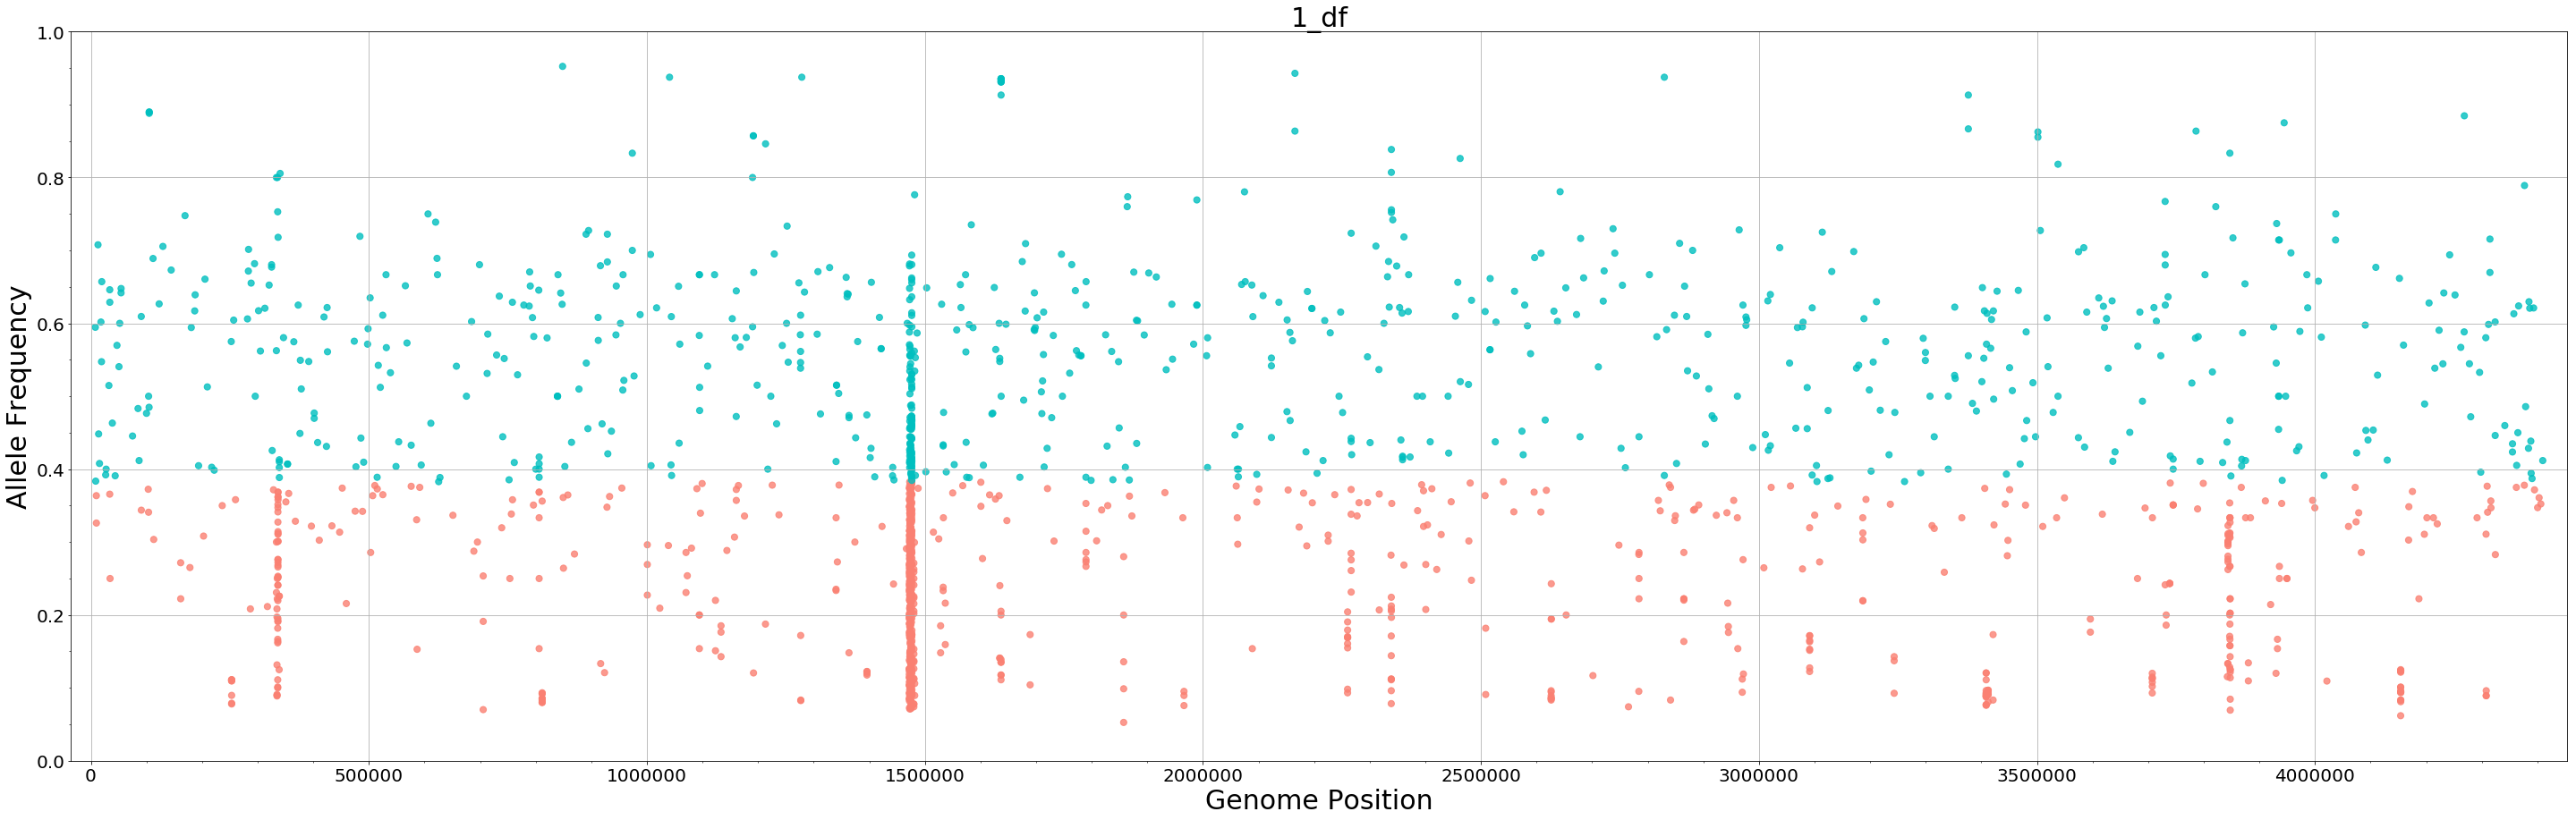

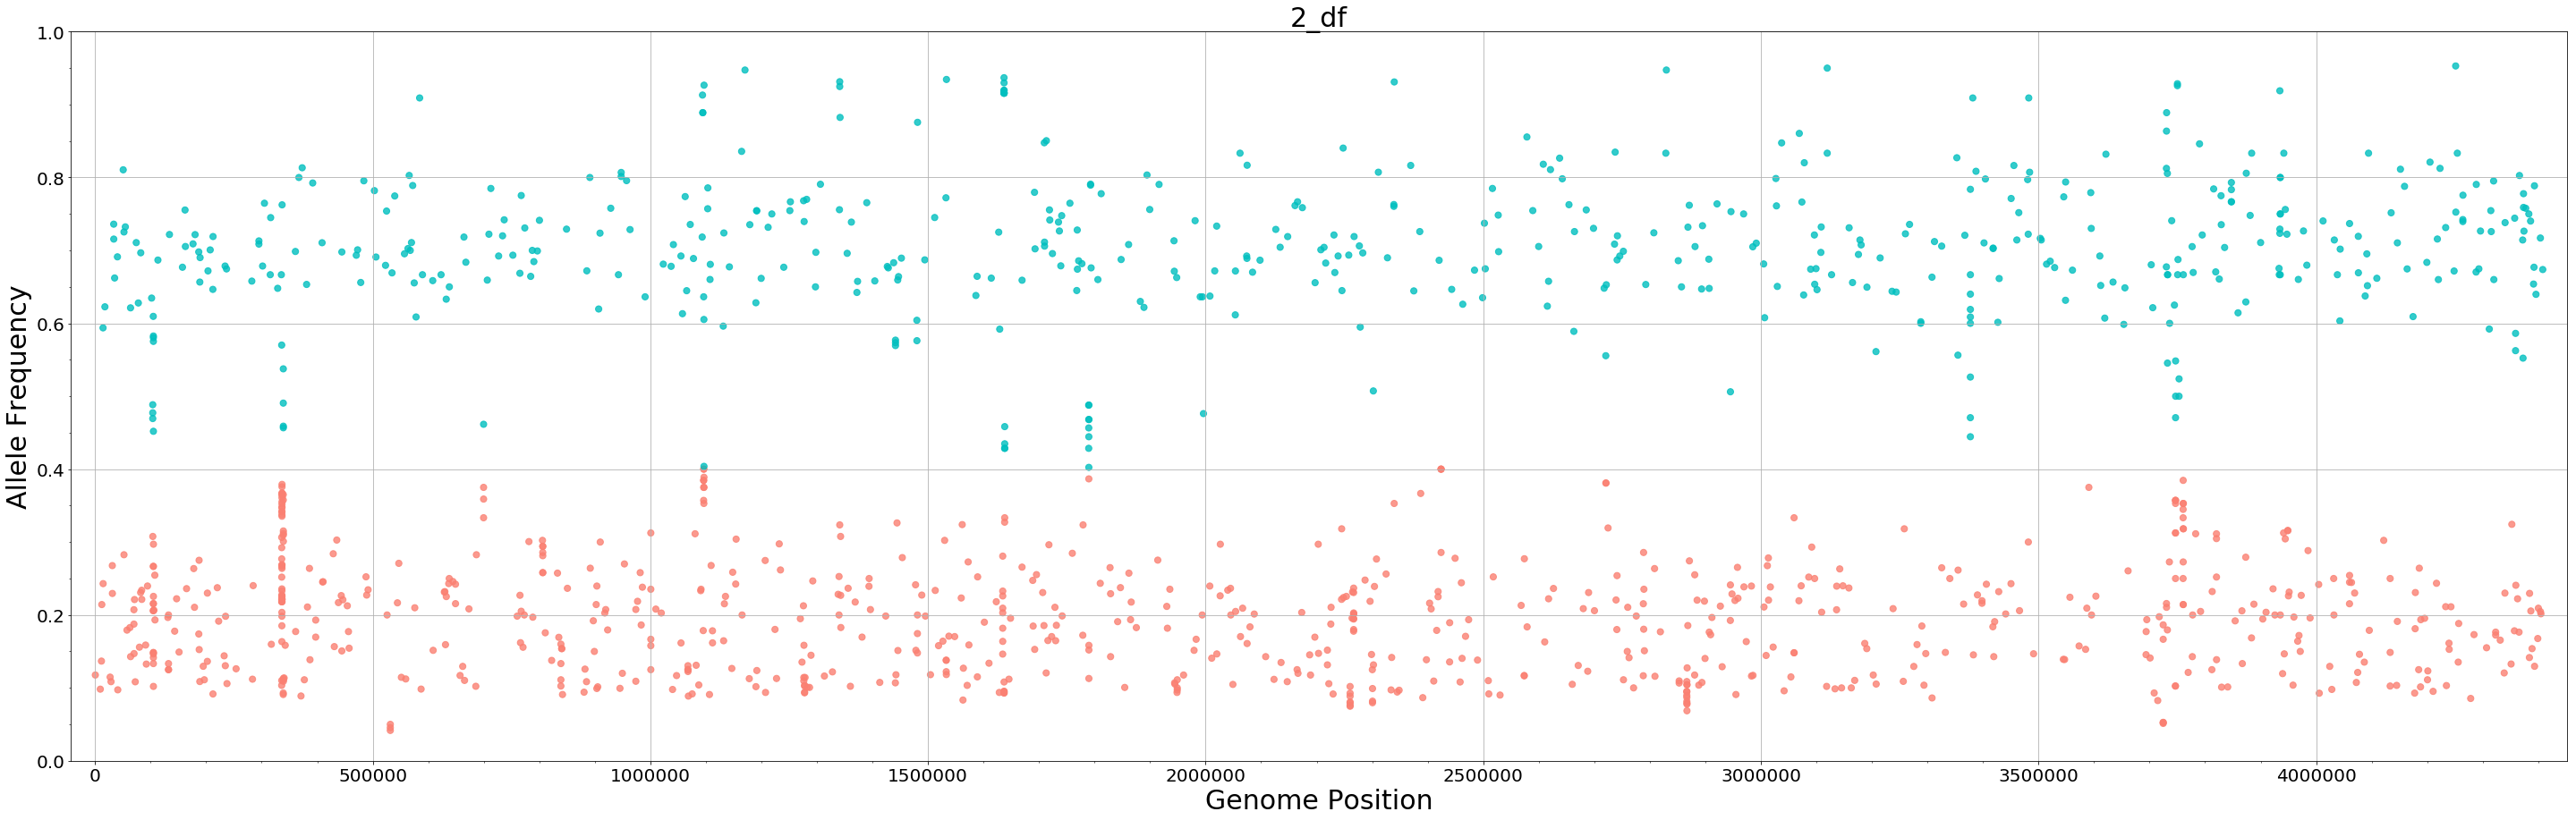

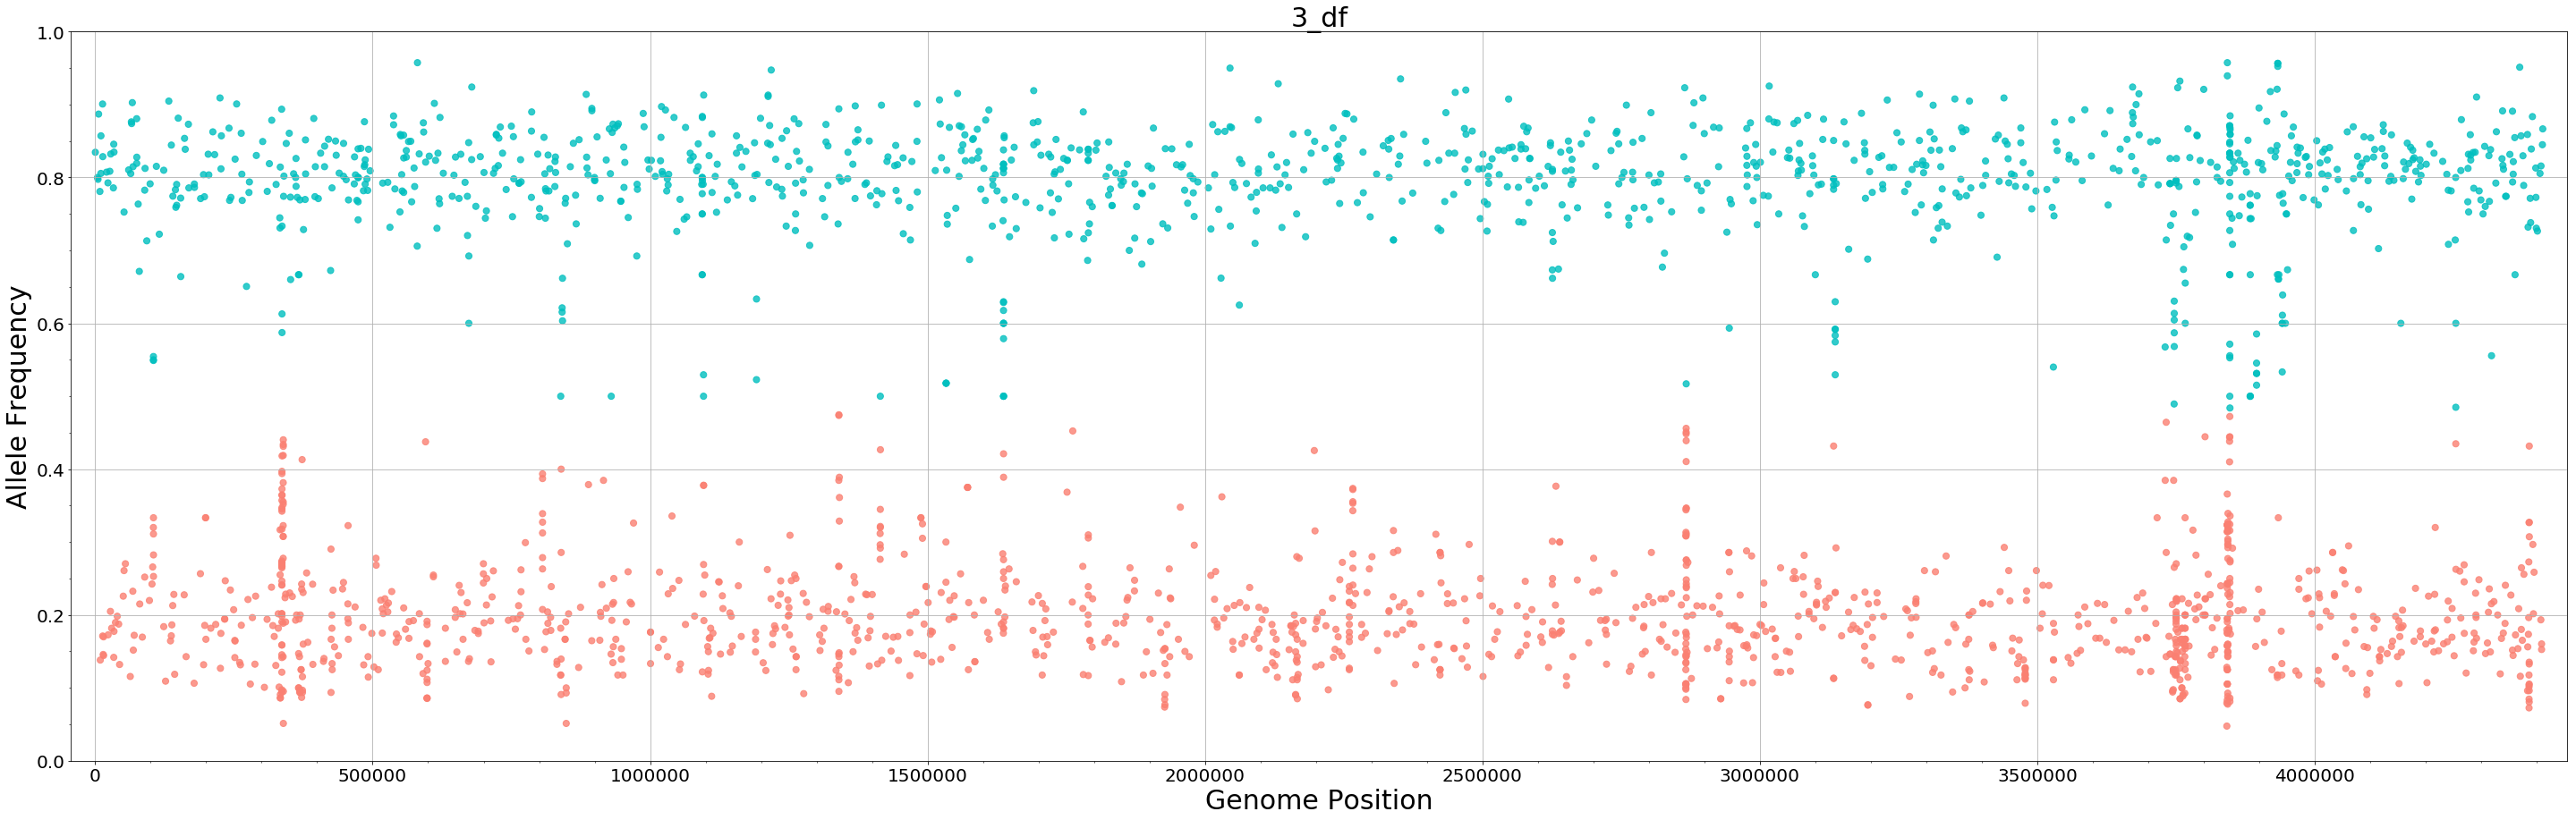

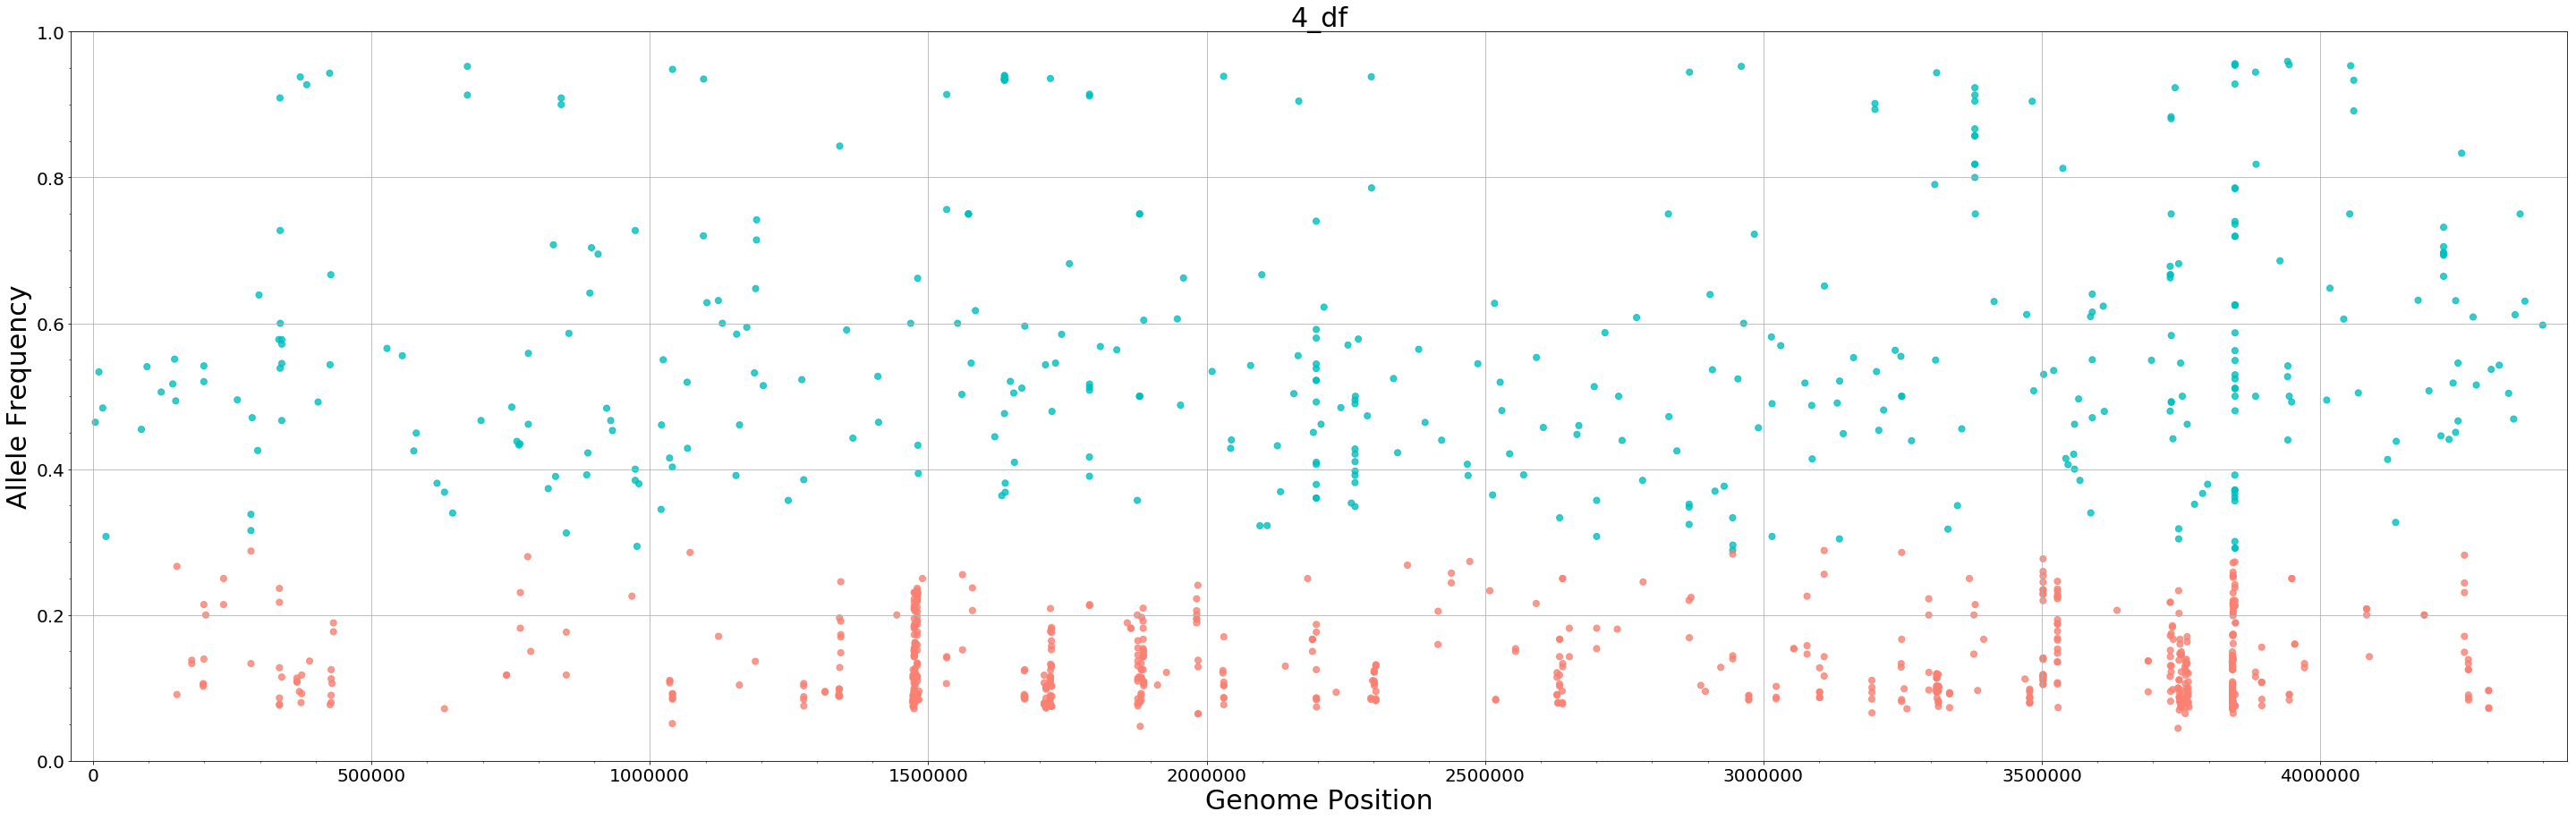

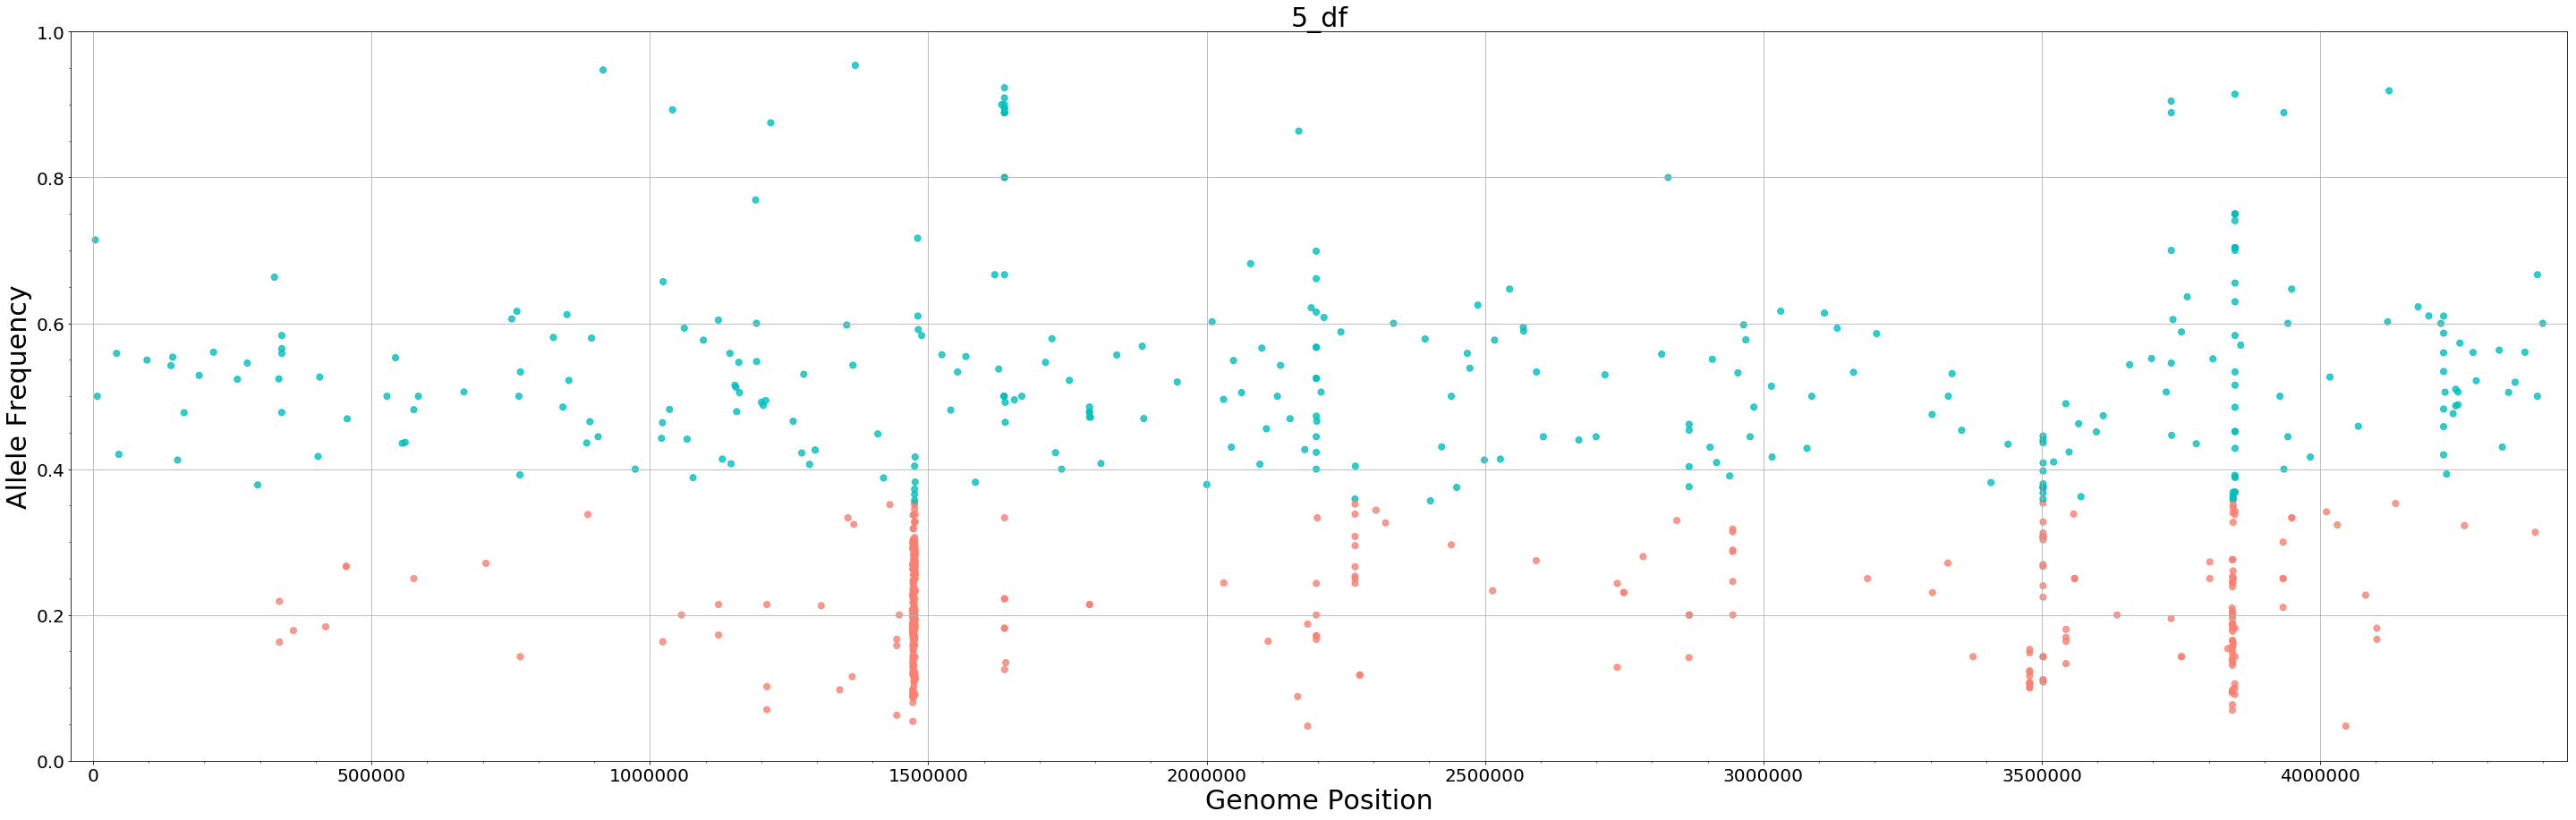

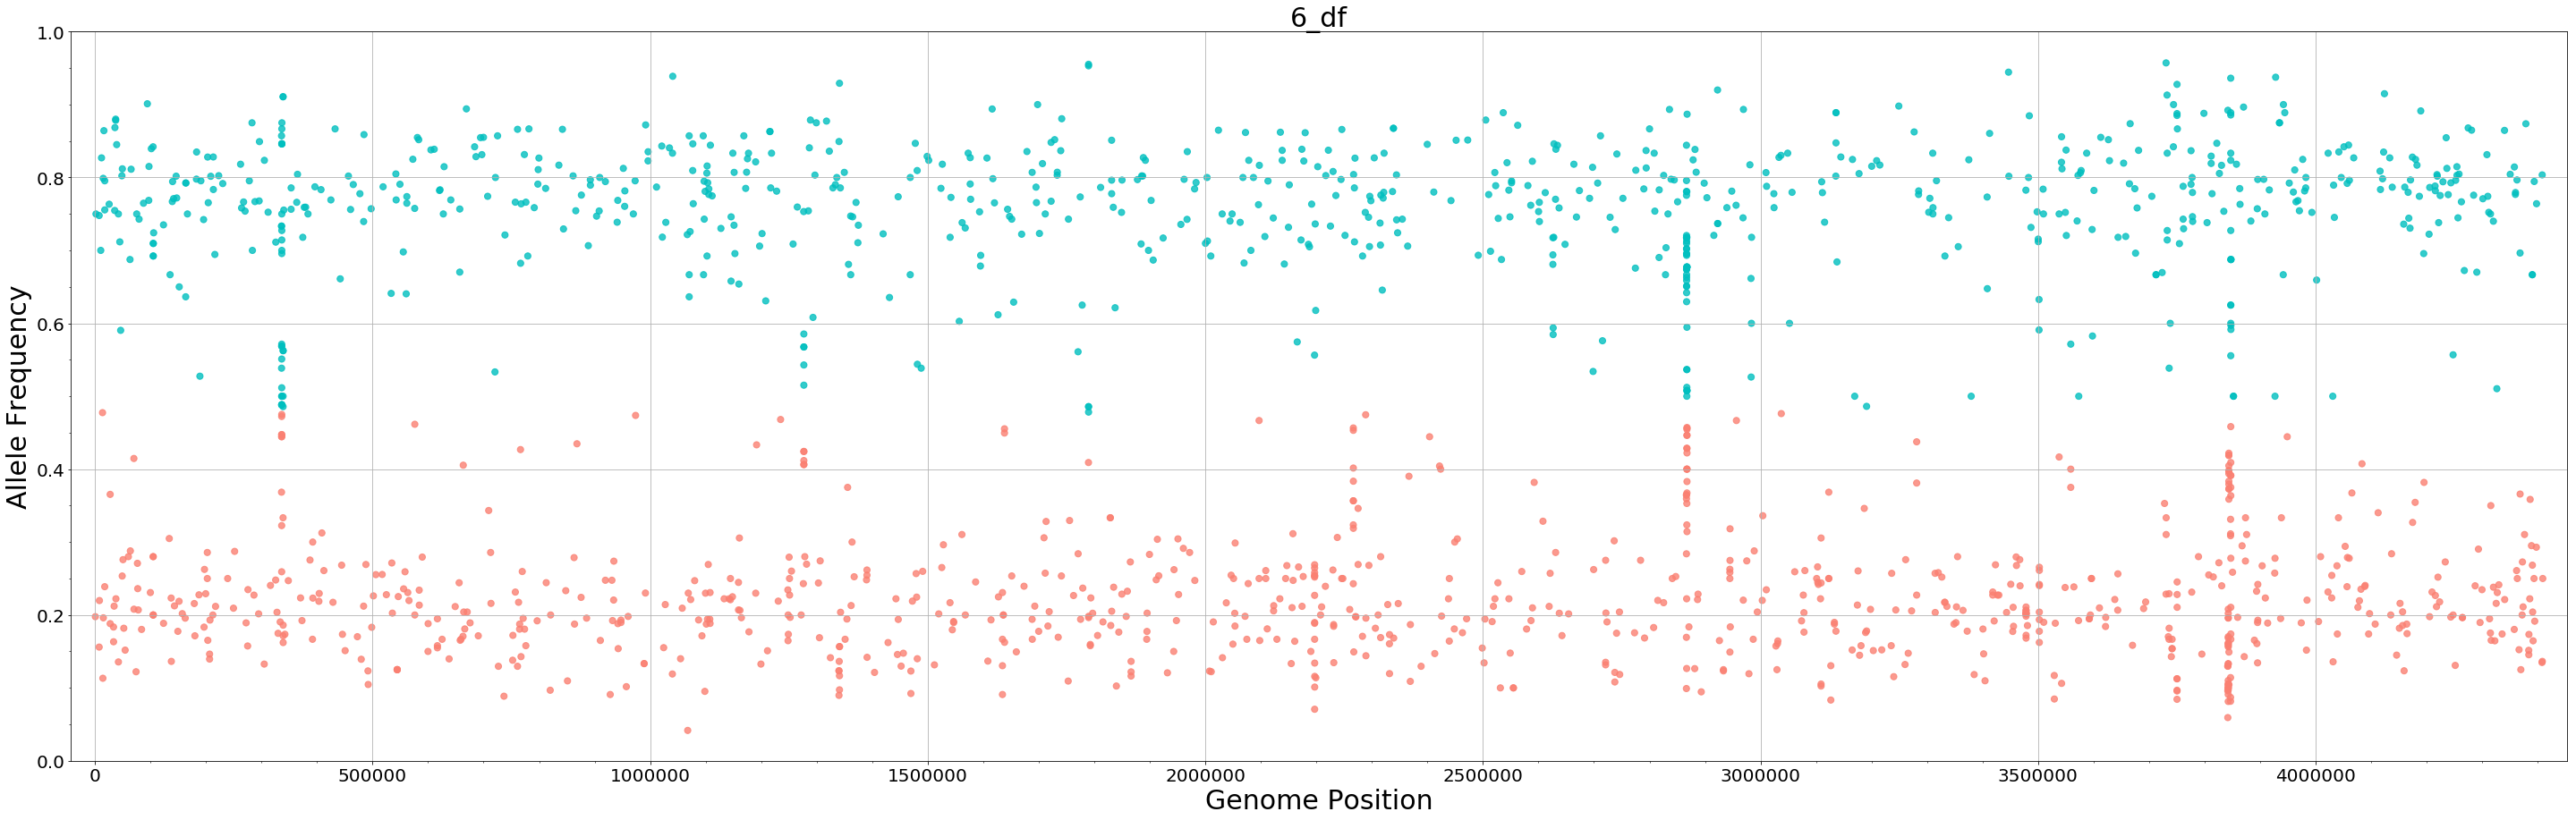

In [92]:
for name_df, df in dict_df.items():
    
    scatter_vcf_pos(df, name_df)

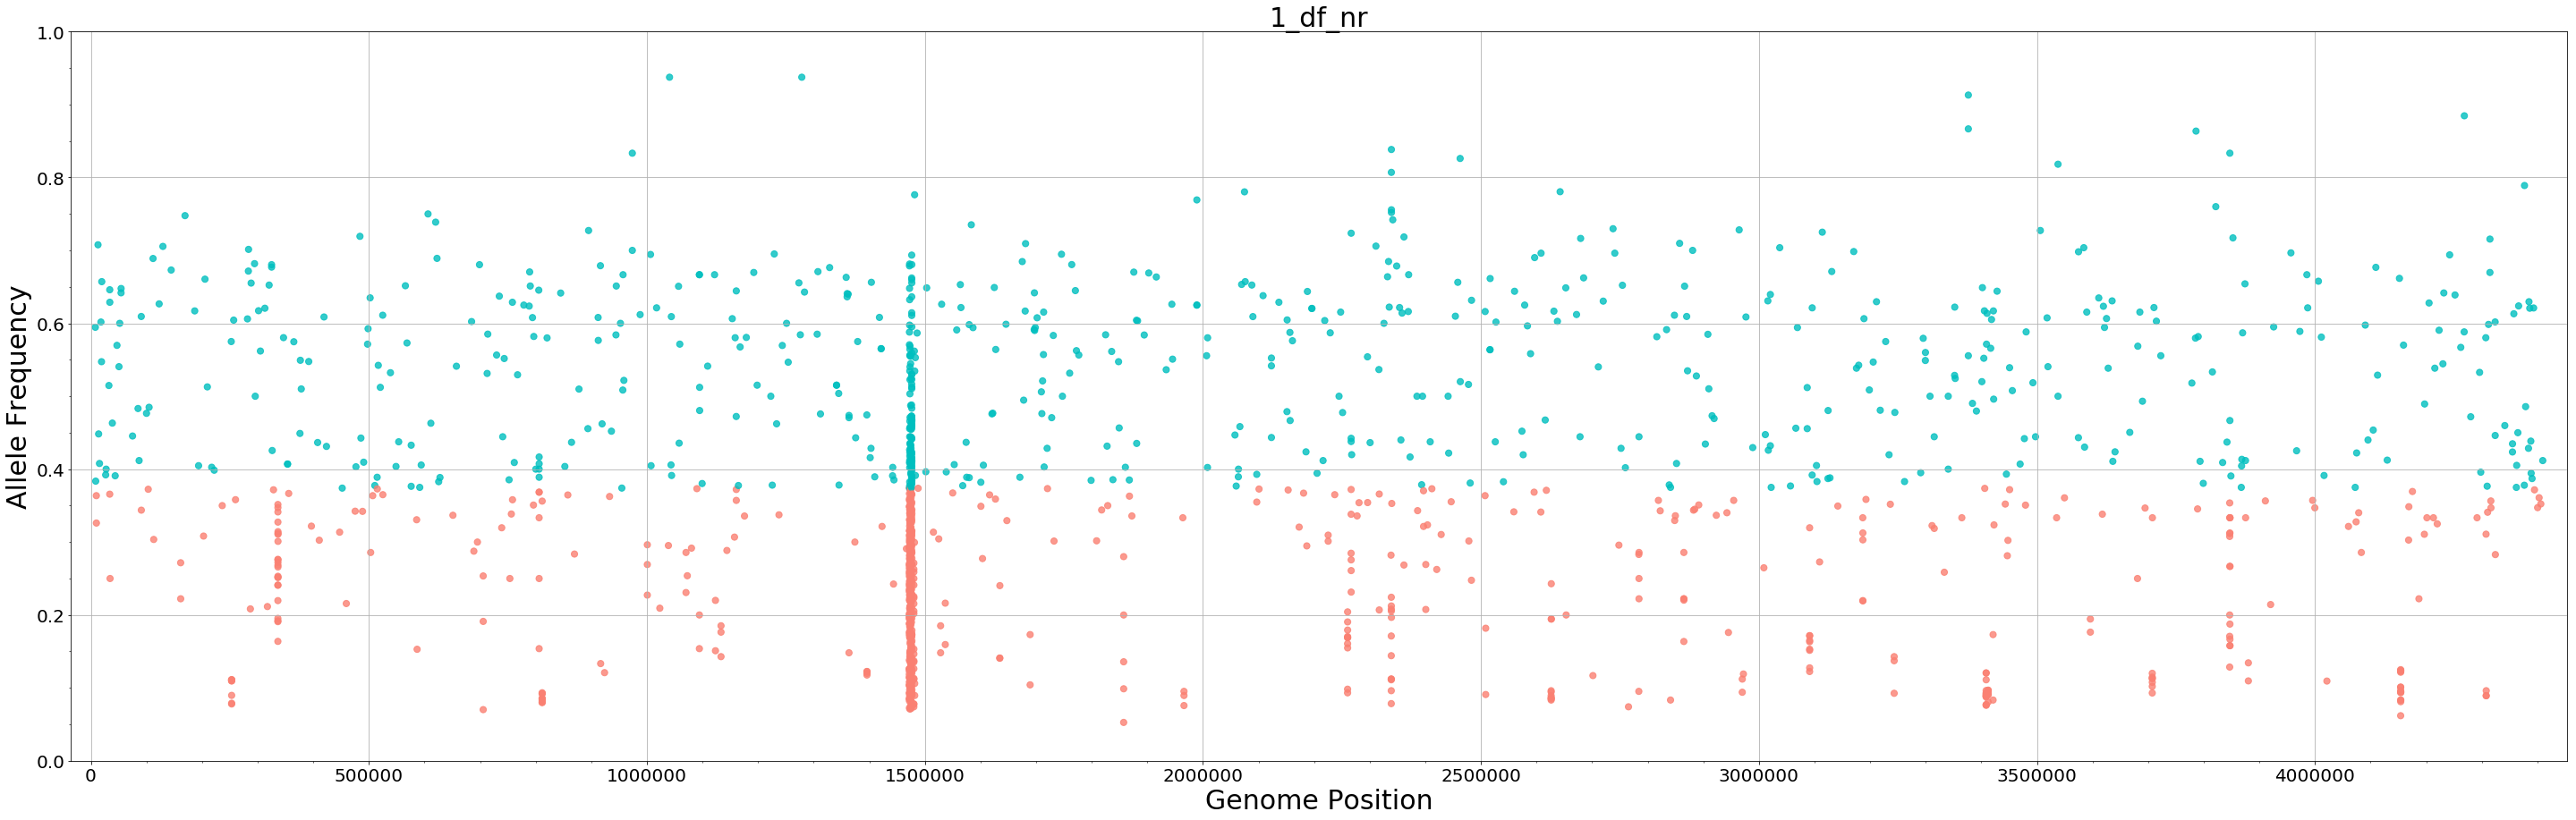

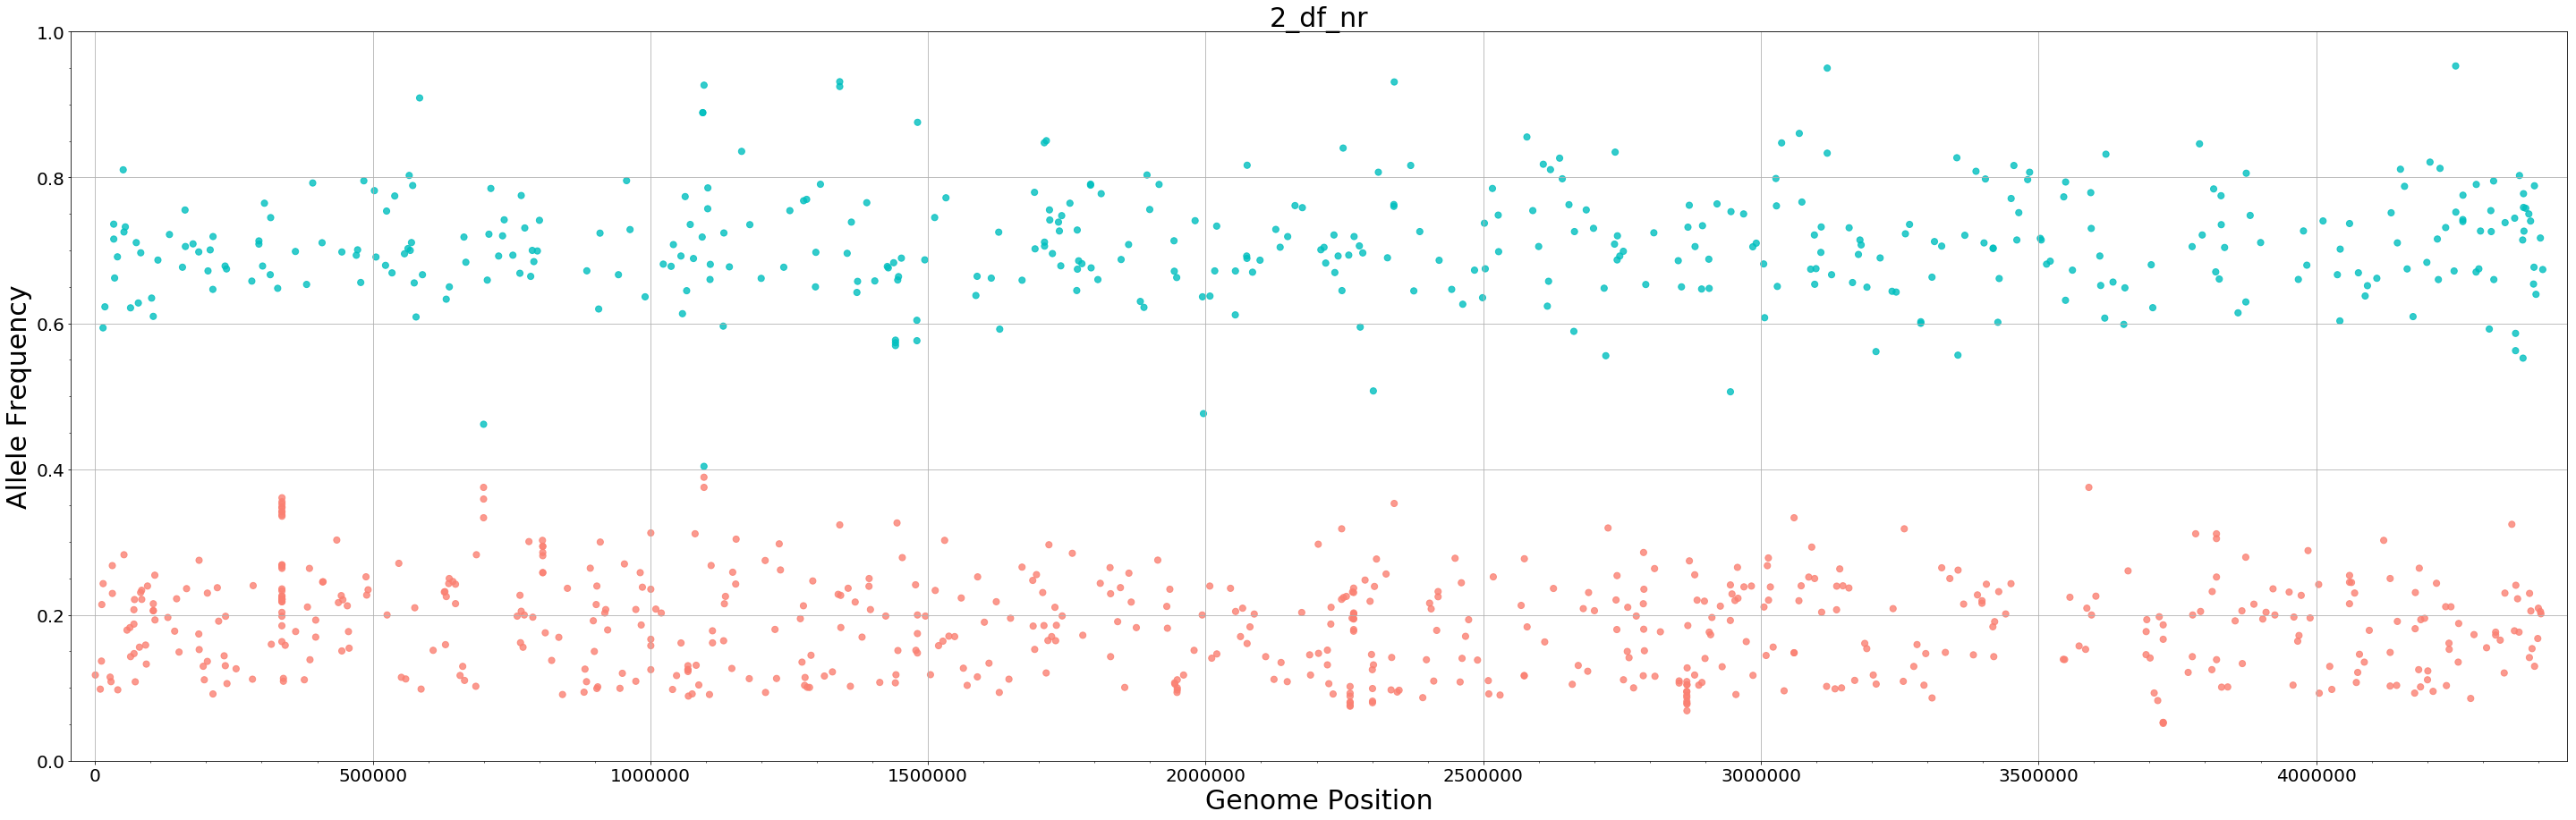

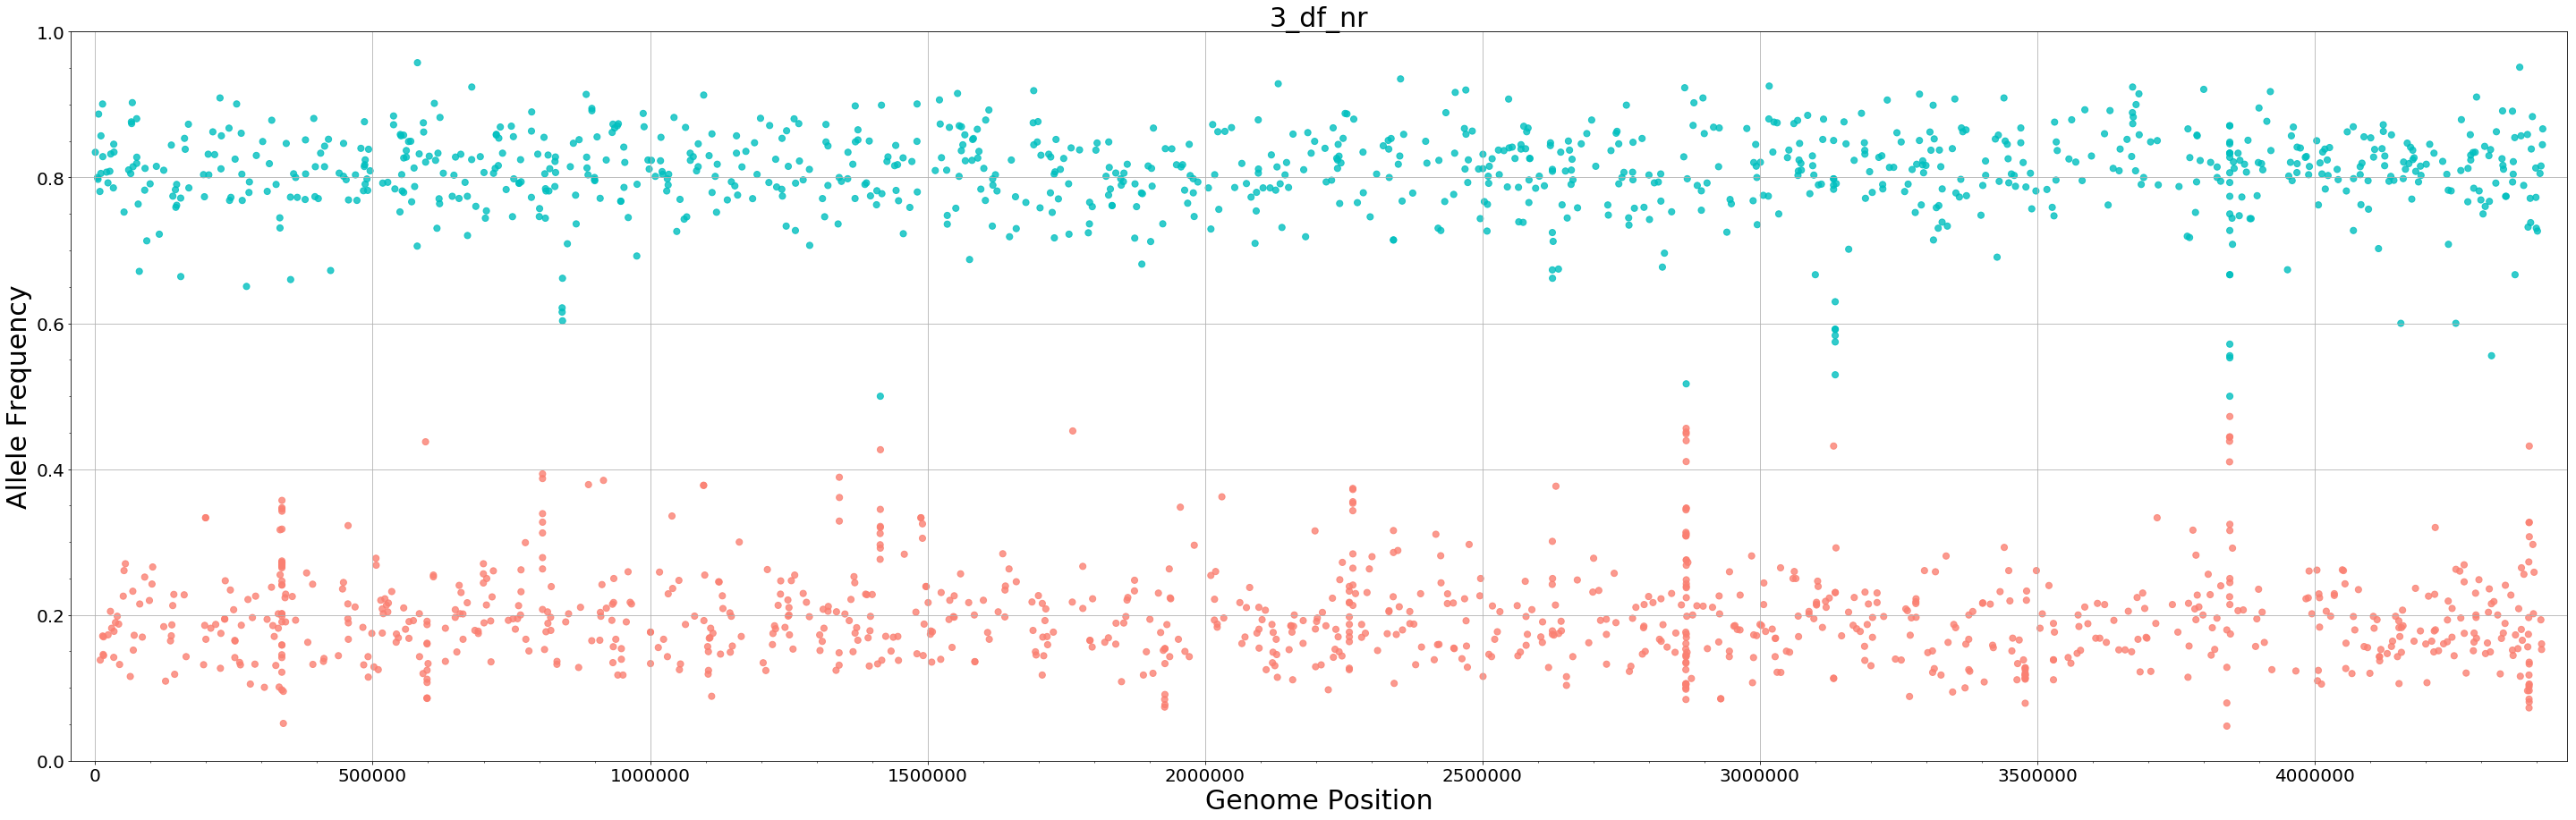

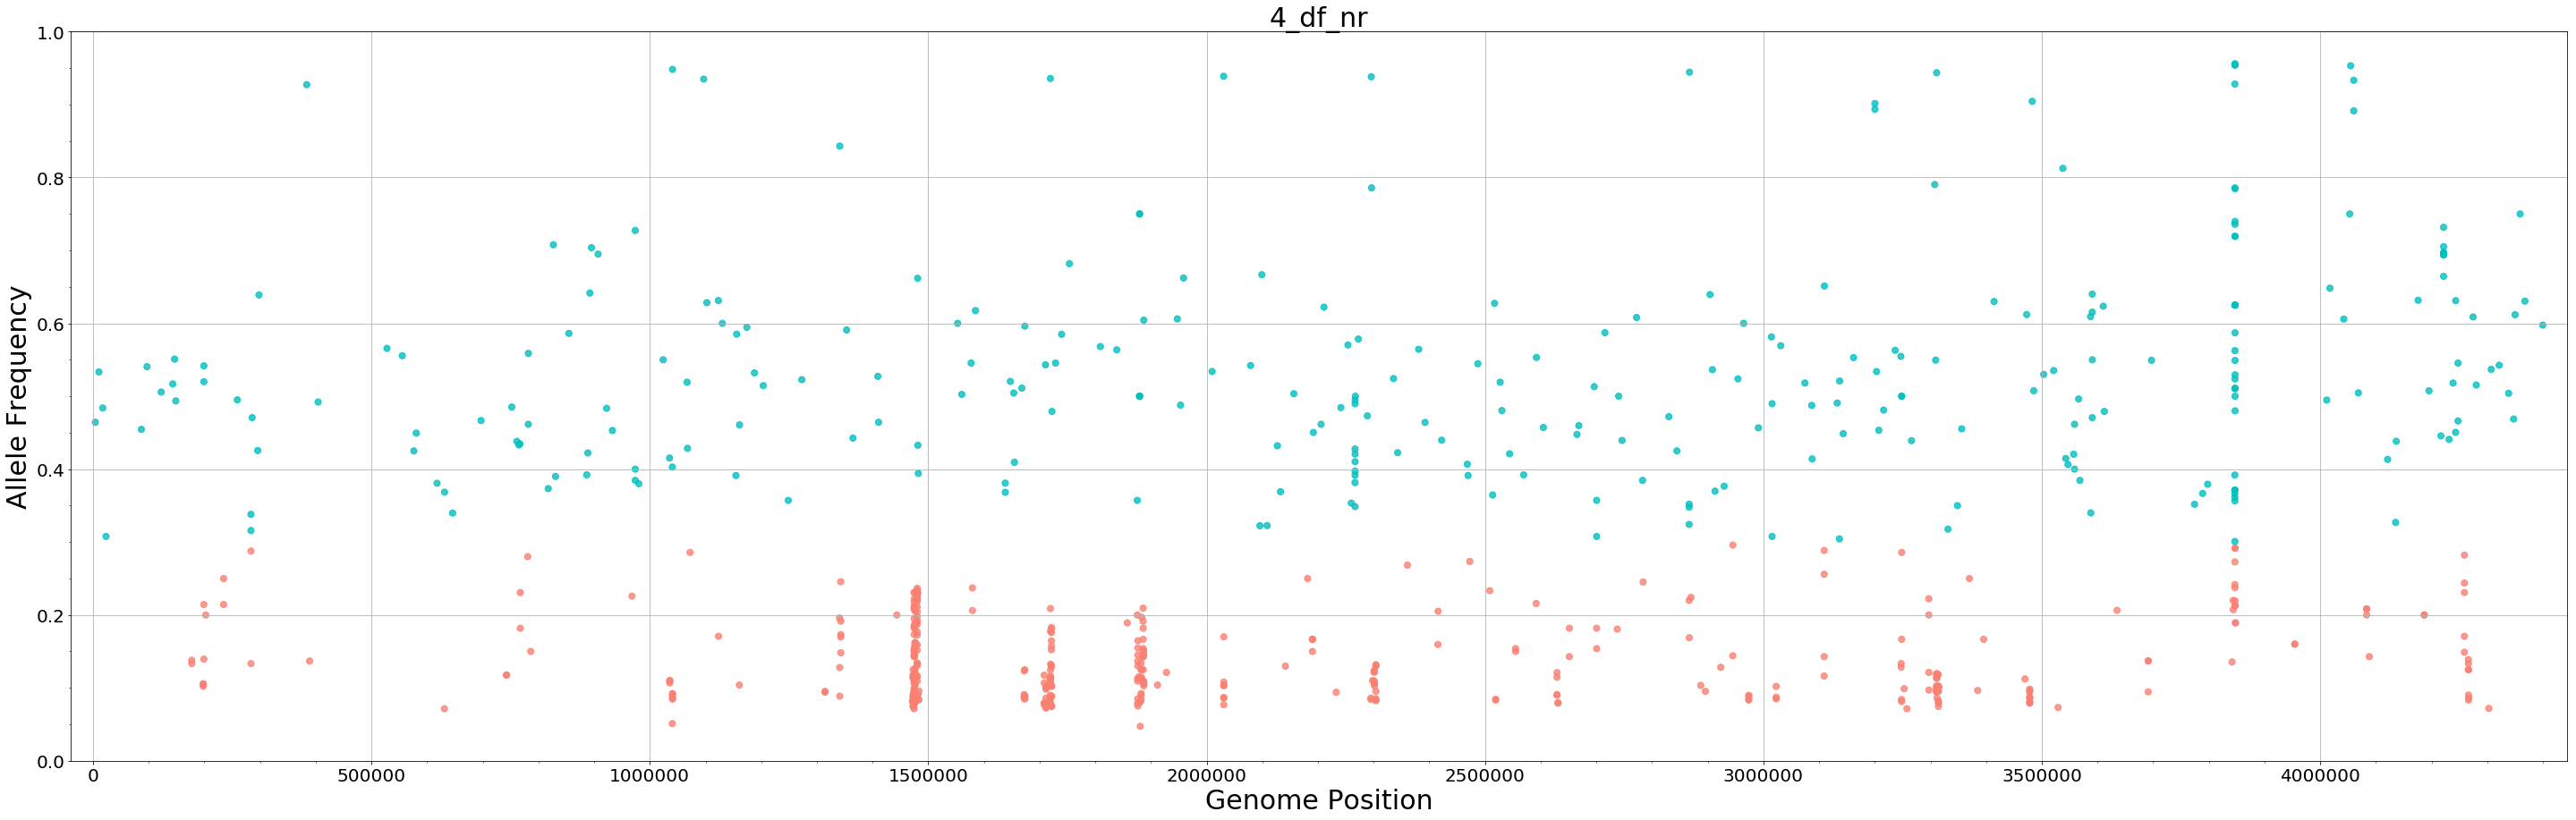

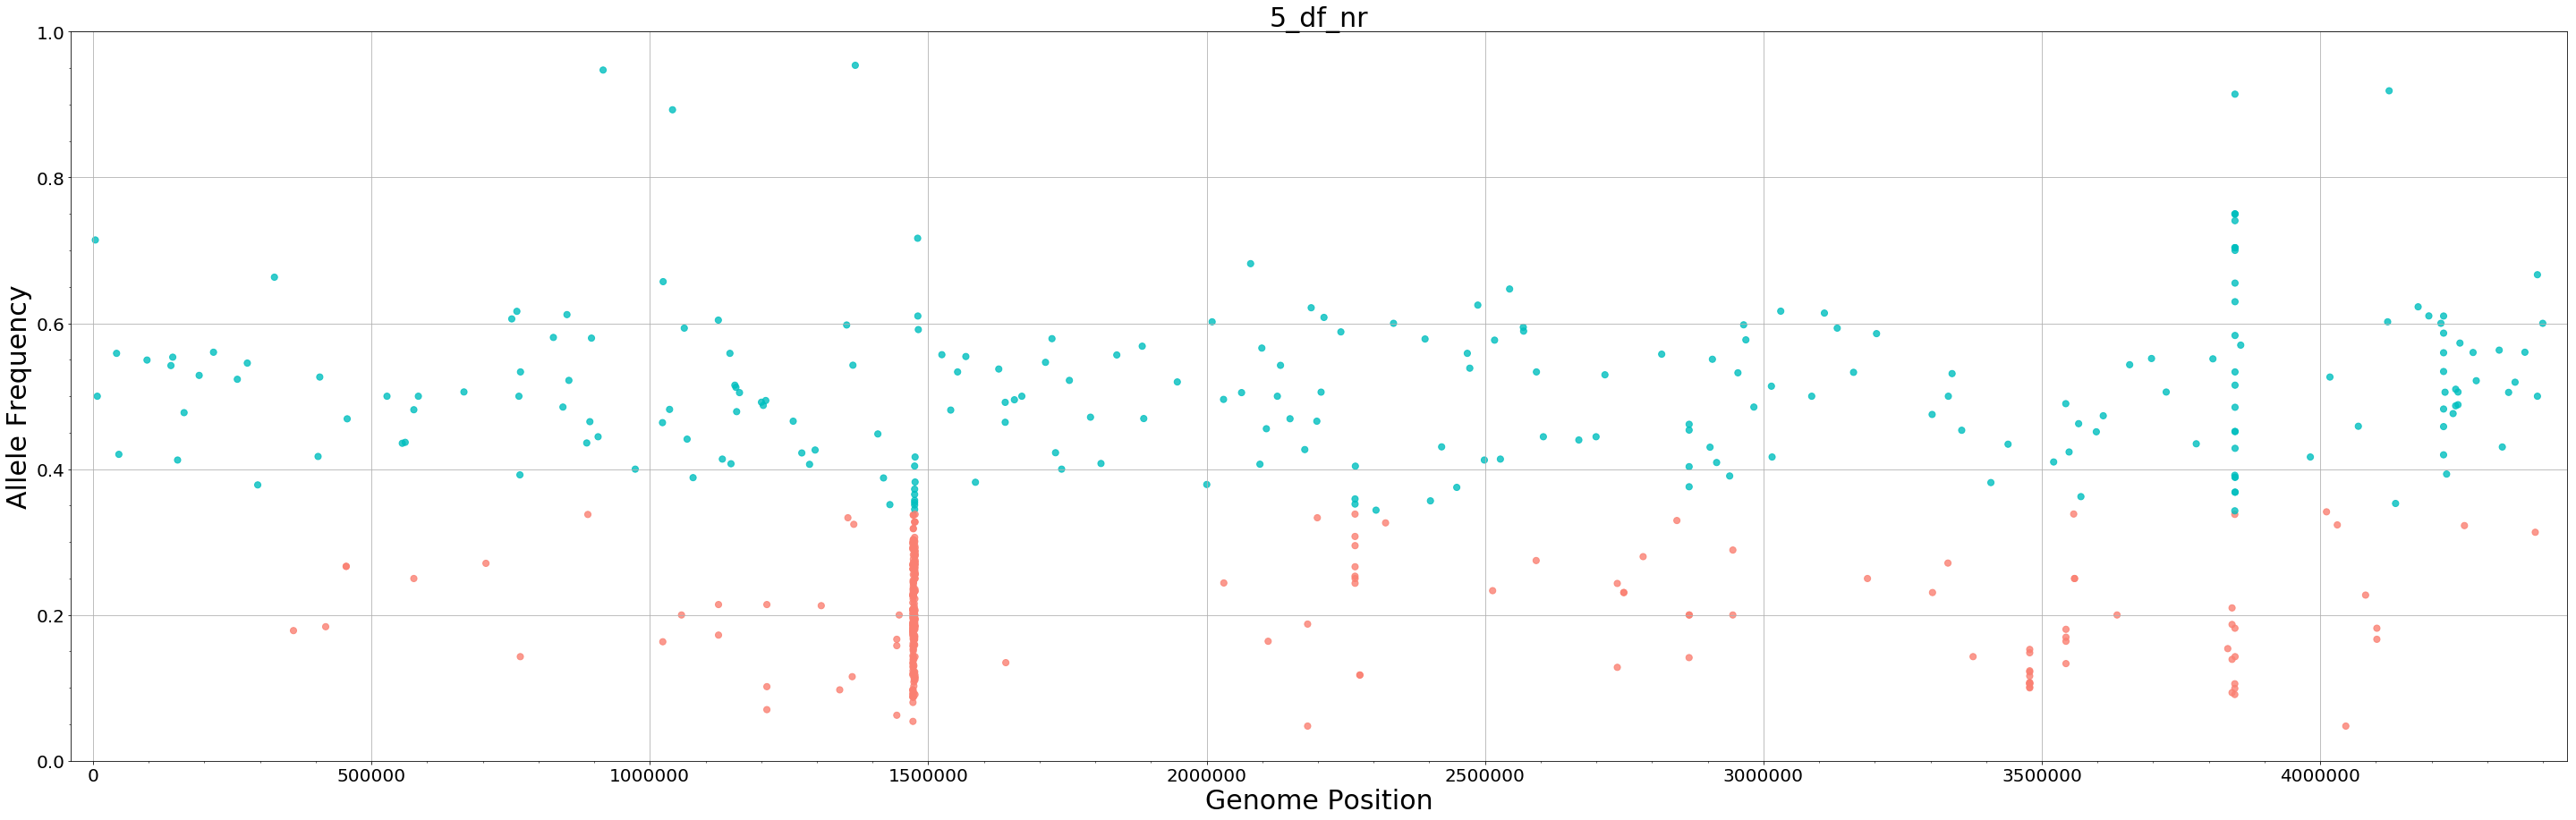

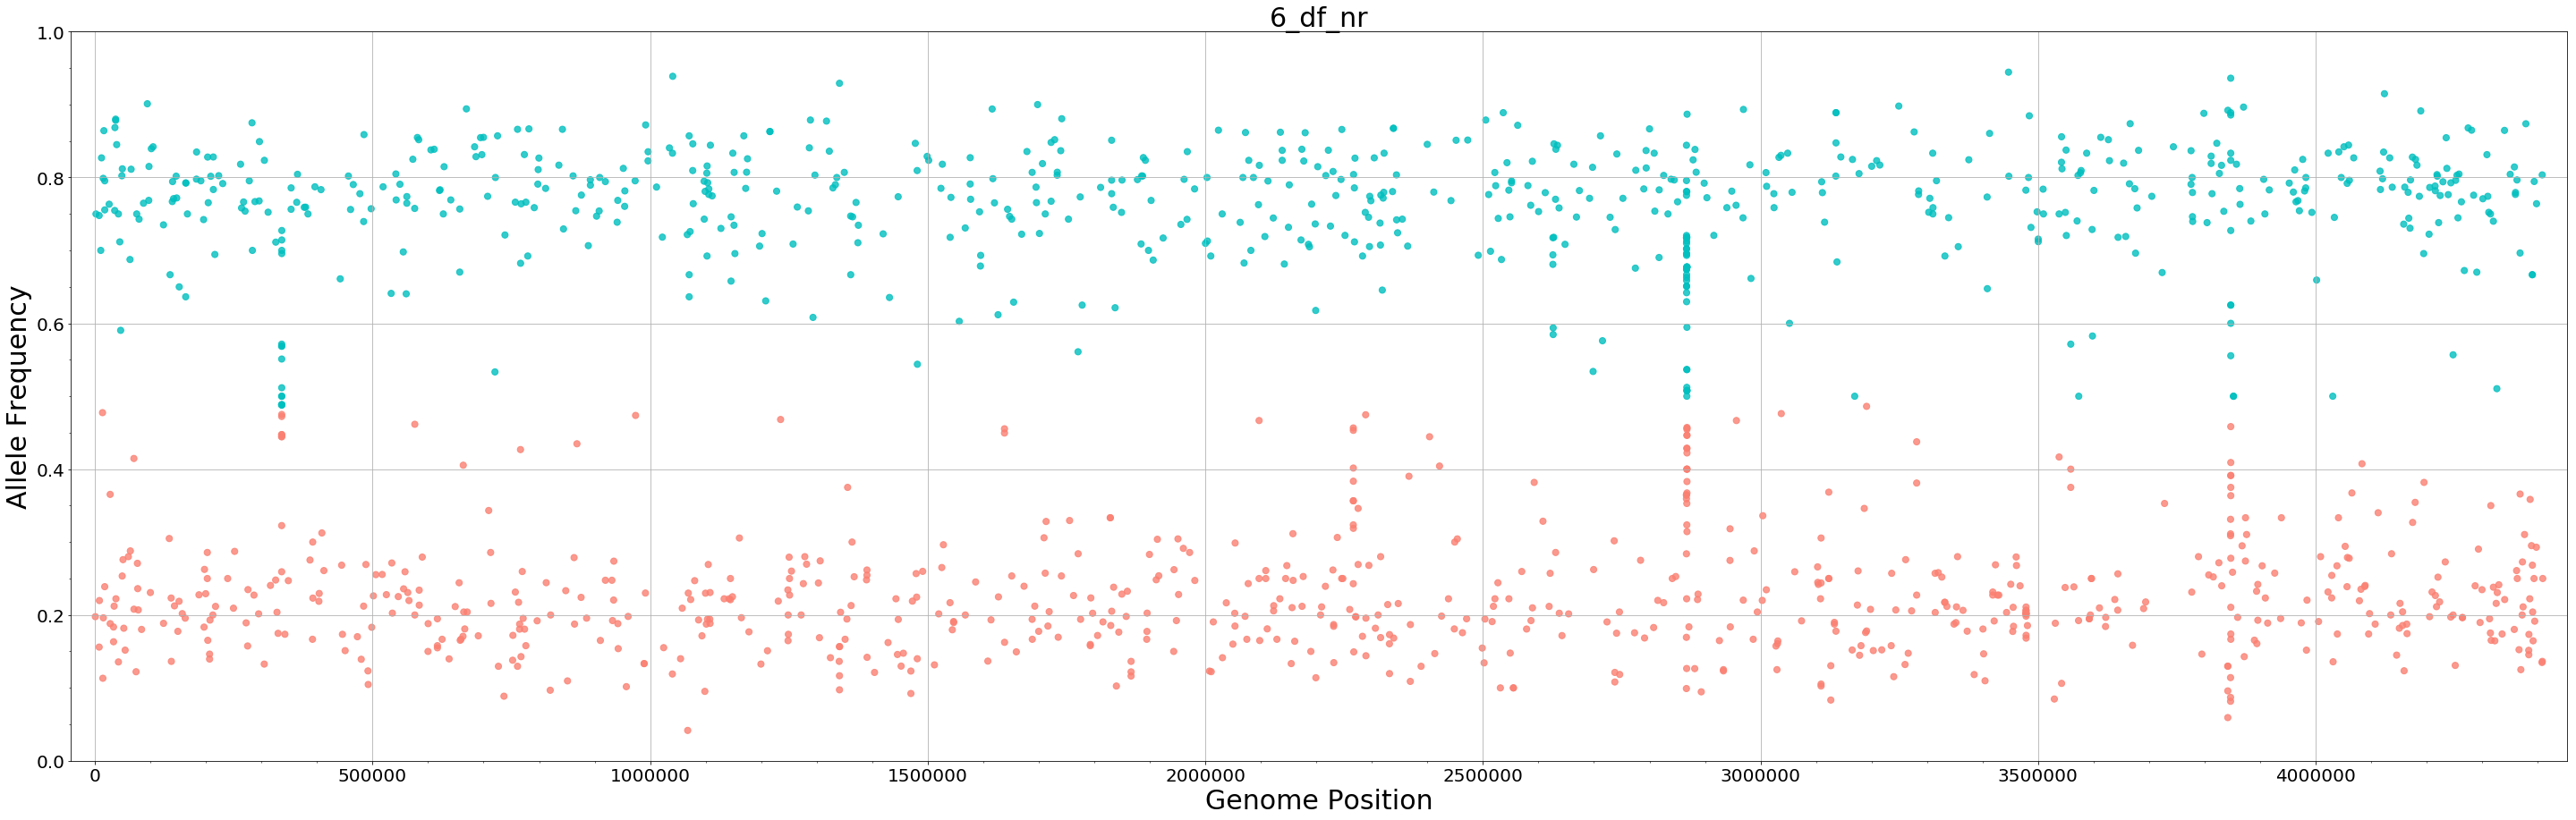

In [93]:
for name_nr, df_nr in dict_nr.items():
    scatter_vcf_pos(df_nr, name_nr)

In [94]:
print(dict_nr["2_df_nr"].loc[1002,'POS'])

2870386.0


In [95]:
def add_snp_distance(vcf_df):
    for index in vcf_df.index.values:
        if index > 0:
            vcf_df.loc[index,'snp_left_distance'] = vcf_df.loc[index,'POS'] - vcf_df.loc[index - 1,'POS']
        if index < (len(vcf_df.index.values) - 1):
            vcf_df.loc[index,'snp_right_distance'] = vcf_df.loc[index + 1,'POS'] - vcf_df.loc[index,'POS']
            
    return vcf_df

In [96]:
#P190_df_nr[P190_df_nr.isnull().any(axis=1)]

In [177]:
#Add distance to nr dataframes
#dict_dist = {}
for name_nr, df_nr in dict_nr.items():
    #name = name_nr + "_ds"
    dict_nr[name_nr] = add_snp_distance(df_nr)

In [178]:
dict_nr["1_df_nr"].head()

#CHROM     POS ID REF ALT     QUAL FILTER  \
0  MTB_anc  2532.0  .   C   T   921.03   PASS   
1  MTB_anc  8049.0  .   T   G  1319.60   PASS   
2  MTB_anc  8688.0  .   G   T   784.60   PASS   
3  MTB_anc  9143.0  .   C   T  3478.03   PASS   
4  MTB_anc  9841.0  .   C   T  1034.60   PASS   

                                                INFO          FORMAT  \
0  AC=2;AF=1.00;AN=2;DP=29;ExcessHet=3.0103;FS=0....  GT:AD:DP:GQ:PL   
1  AC=1;AF=0.500;AN=2;BaseQRankSum=0.873;DP=74;Ex...  GT:AD:DP:GQ:PL   
2  AC=1;AF=0.500;AN=2;BaseQRankSum=1.87;DP=73;Exc...  GT:AD:DP:GQ:PL   
3  AC=2;AF=1.00;AN=2;DP=106;ExcessHet=3.0103;FS=0...  GT:AD:DP:GQ:PL   
4  AC=1;AF=0.500;AN=2;BaseQRankSum=0.148;DP=121;E...  GT:AD:DP:GQ:PL   

                         sample  ...  PGT  PID   PS  REF_AD  ALT_AD        aF  \
0       1/1:0,29:29:87:935,87,0  ...  NaN  NaN  NaN     0.0    29.0  0.000000   
1    0/1:30,44:74:99:1327,0,793  ...  NaN  NaN  NaN    30.0    44.0  0.405405   
2    0/1:45,28:73:99:792,0,1301  ...  NaN  NaN  NaN    45.0    28.0  0.616438   
3   1/1:0,106:106:99:3492,318,0  ...  NaN  NaN  NaN     0.0   106.0  0.000000   
4  0/1:77,44:121:99:1042,0,2063  ...  NaN  NaN  NaN    77.0    44.0  0.636364   

         AF  Is_repeat  snp_right_distance  snp_left_distance  
0  1.000000      False              5517.0                NaN  
1  0.594595      False               639.0             5517.0  
2  0.383562      False               455.0              639.0  
3  1.000000      False               698.0              455.0  
4  0.363636      False               103.0              698.0  

[5 rows x 38 columns]

In [179]:
def filter_by_distance(vcf_dist_df, distance):
    vcf_df_filtered_distance = vcf_dist_df[((vcf_dist_df['snp_right_distance'] > distance) | (vcf_dist_df['snp_left_distance'] > distance))]
    return vcf_df_filtered_distance

In [180]:
dict_dsf = {}
for name_nr, df_nr in dict_nr.items():
    name_dsf = name_nr + "_dsf"
    dict_dsf[name_dsf] = filter_by_distance(df_nr, 1000)

In [181]:
for i in dict_dsf:
    print(i)

1_df_nr_dsf
2_df_nr_dsf
3_df_nr_dsf
4_df_nr_dsf
5_df_nr_dsf
6_df_nr_dsf


In [182]:
print(dict_nr["1_df_nr"].shape)
print(dict_dsf["1_df_nr_dsf"].shape)

(1956, 38)
(1177, 38)


In [183]:
dict_dsf["3_df_nr_dsf"]['AF'].describe()

count    1566.000000
mean        0.527662
std         0.315796
min         0.047619
25%         0.194030
50%         0.736364
75%         0.818182
max         1.000000
Name: AF, dtype: float64

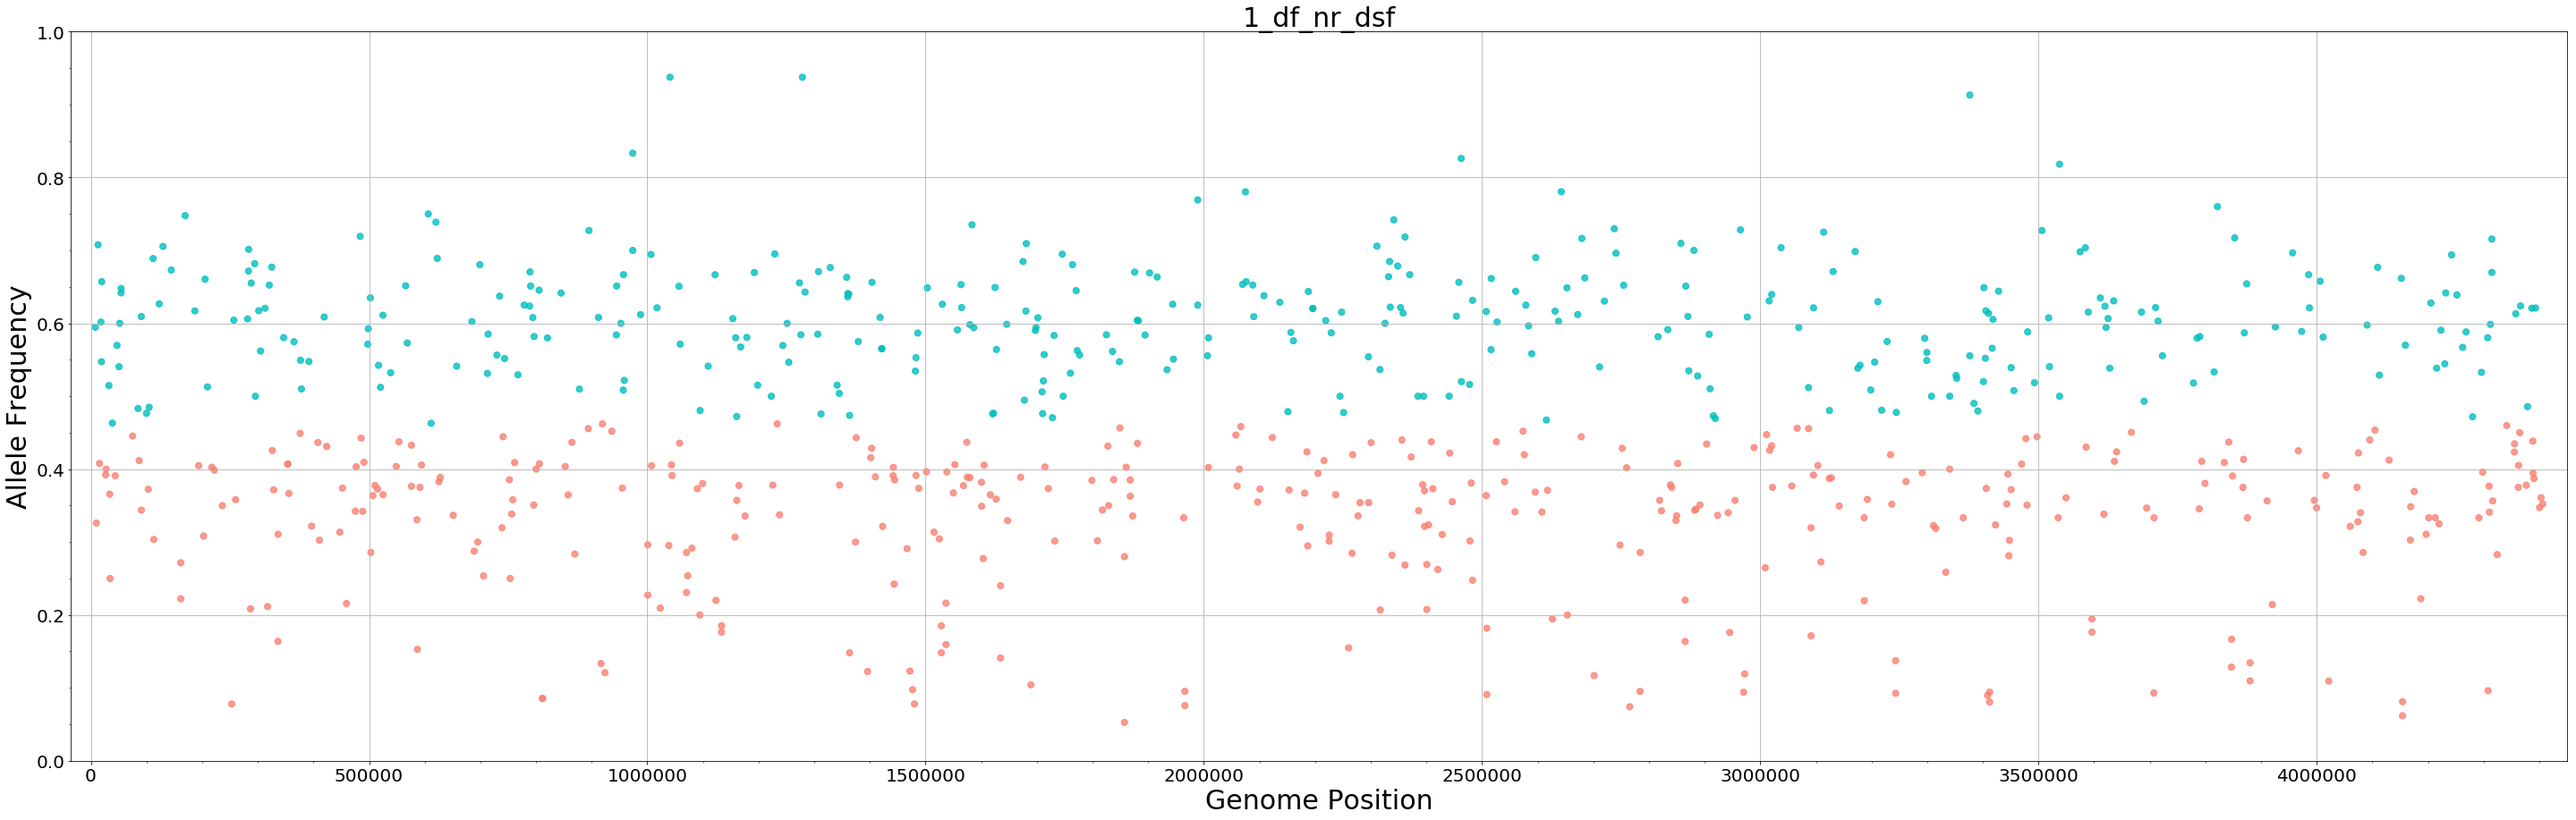

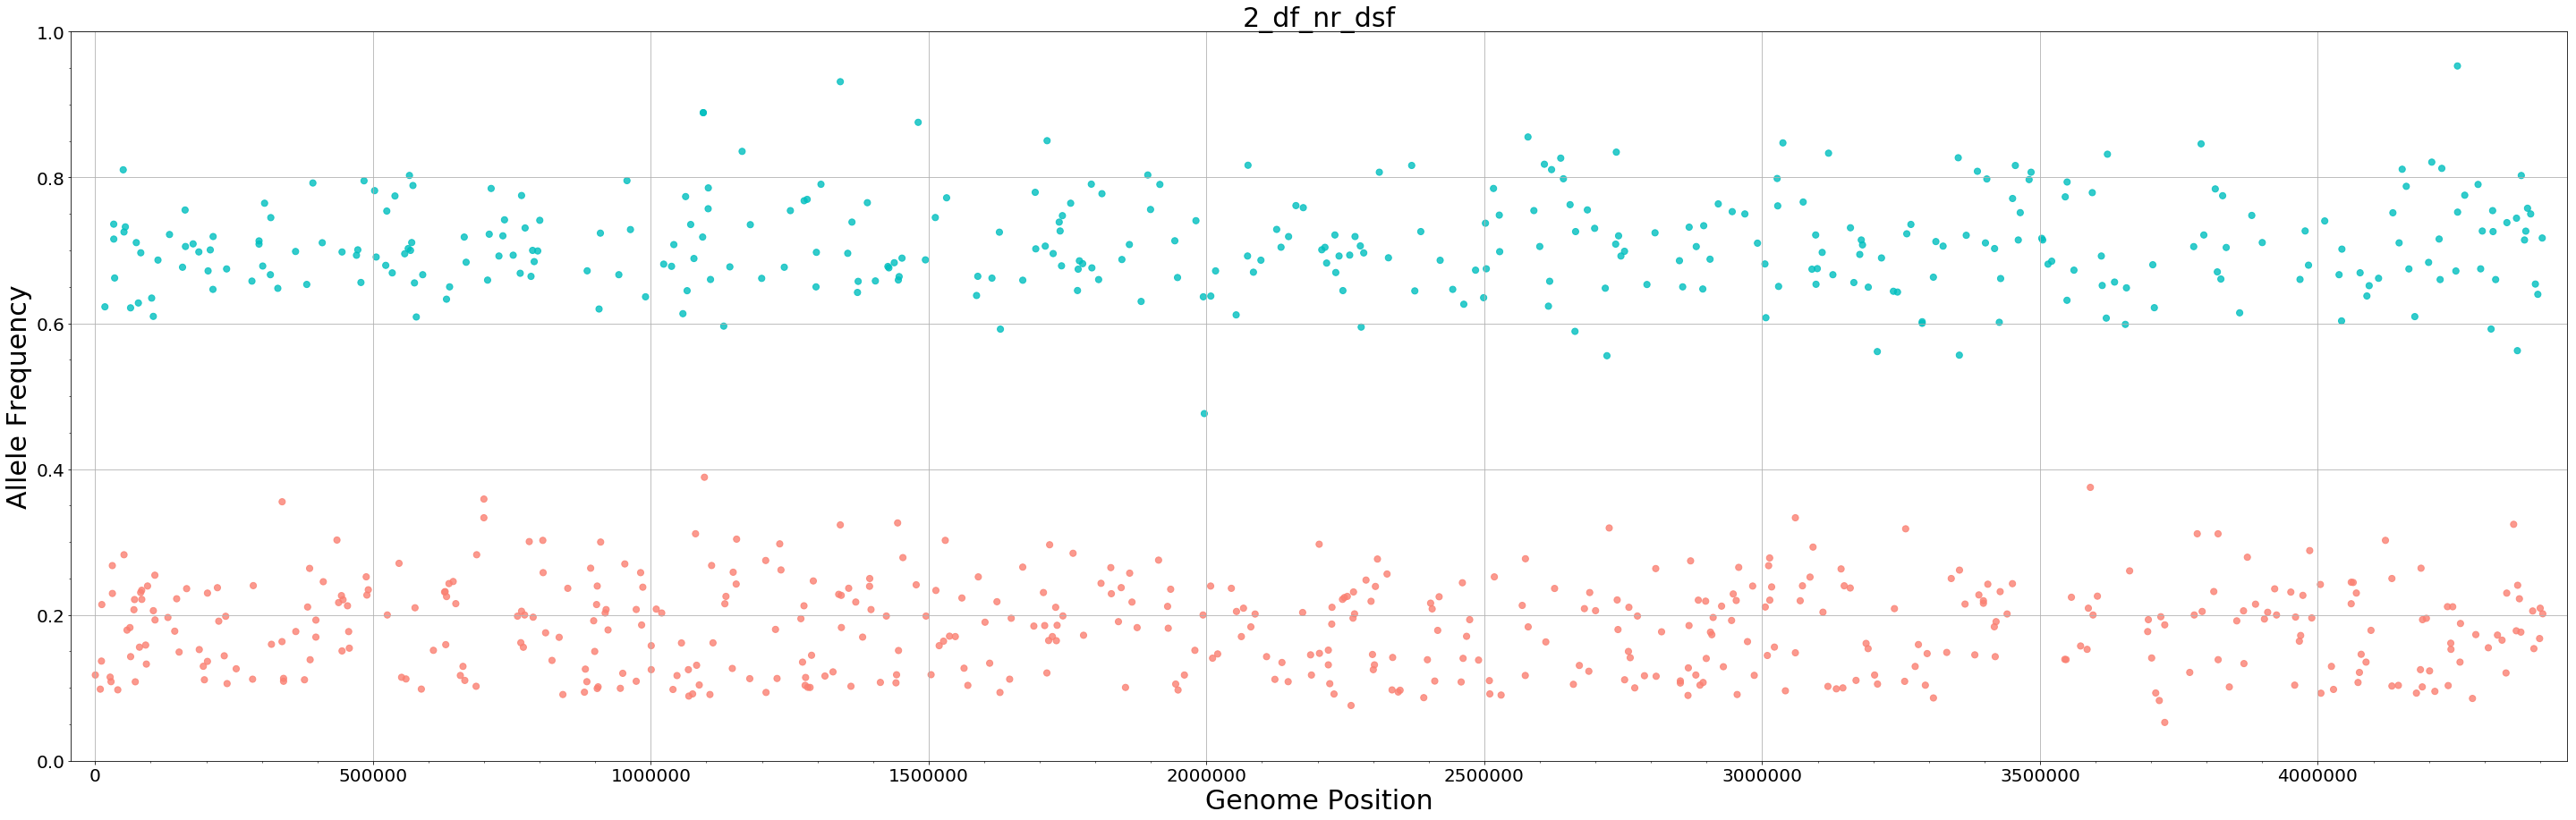

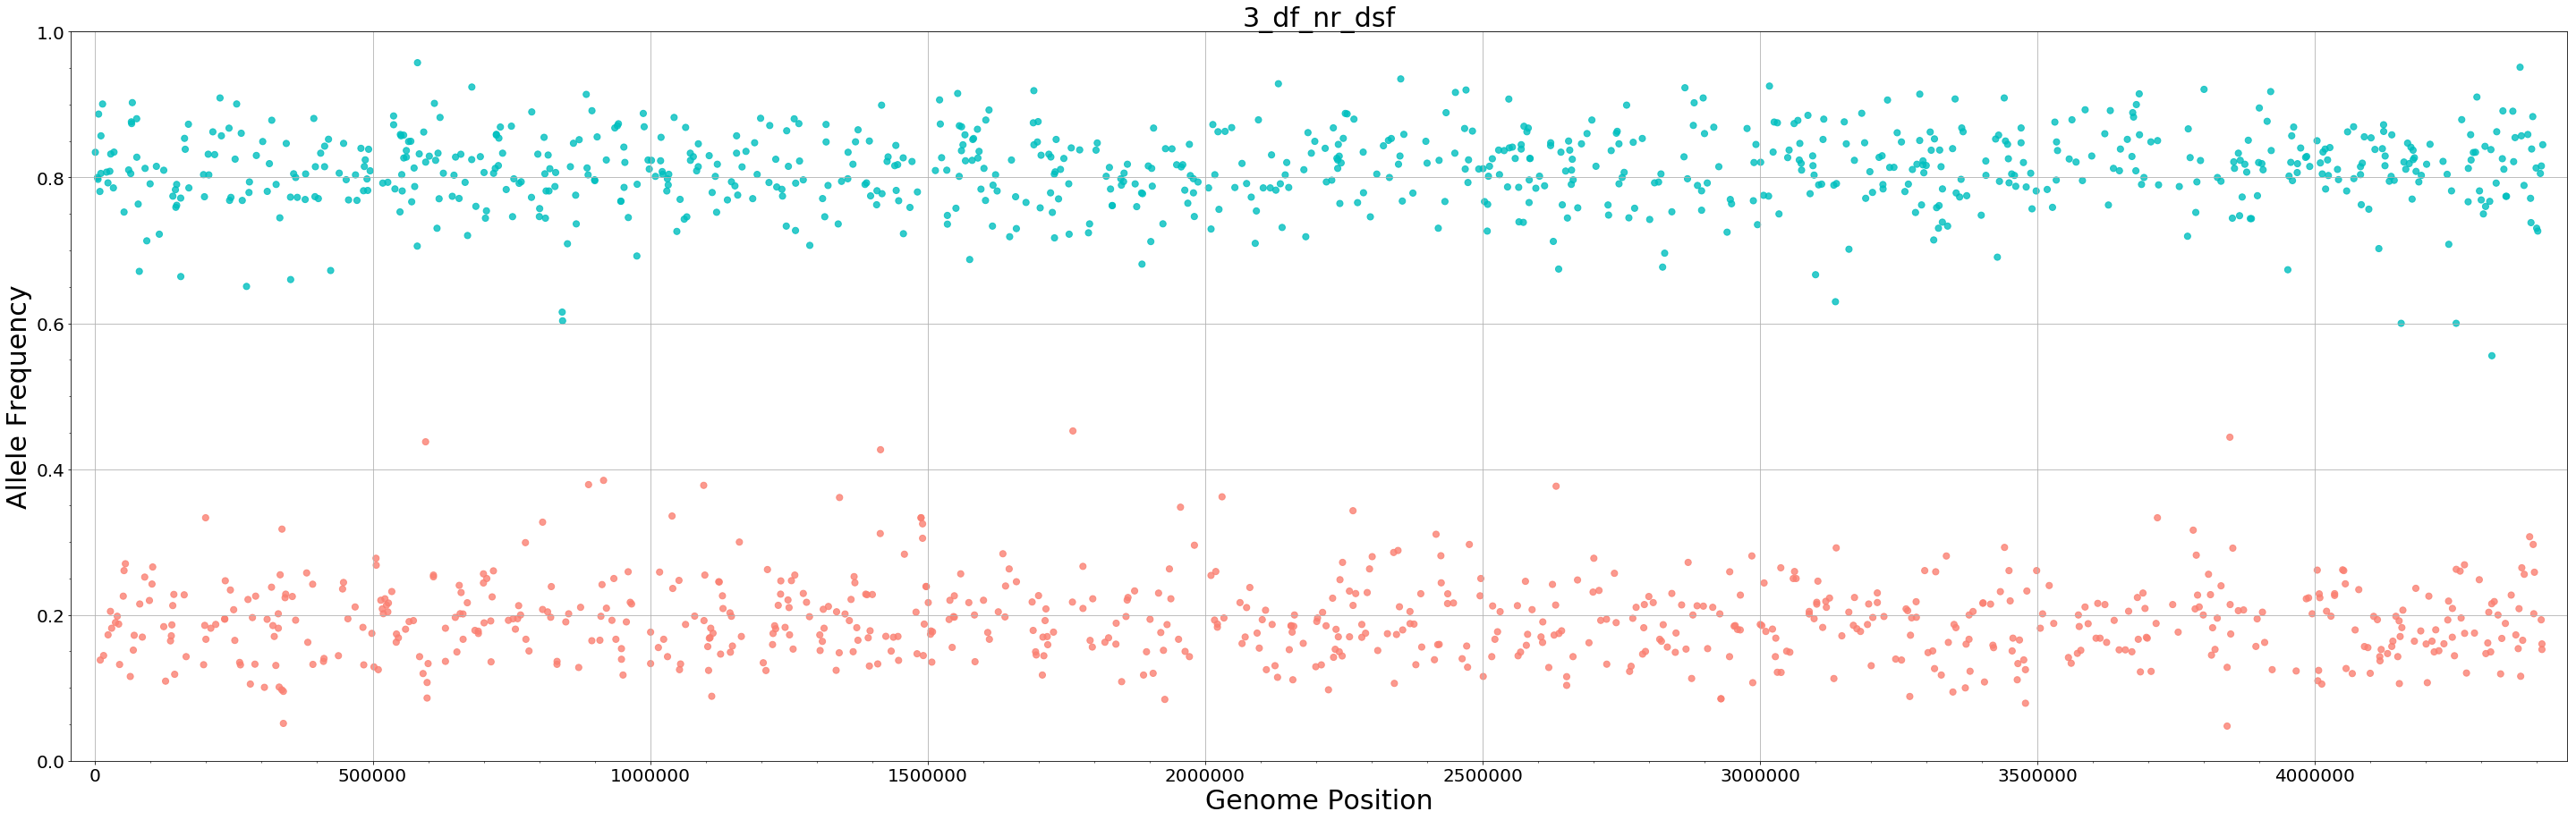

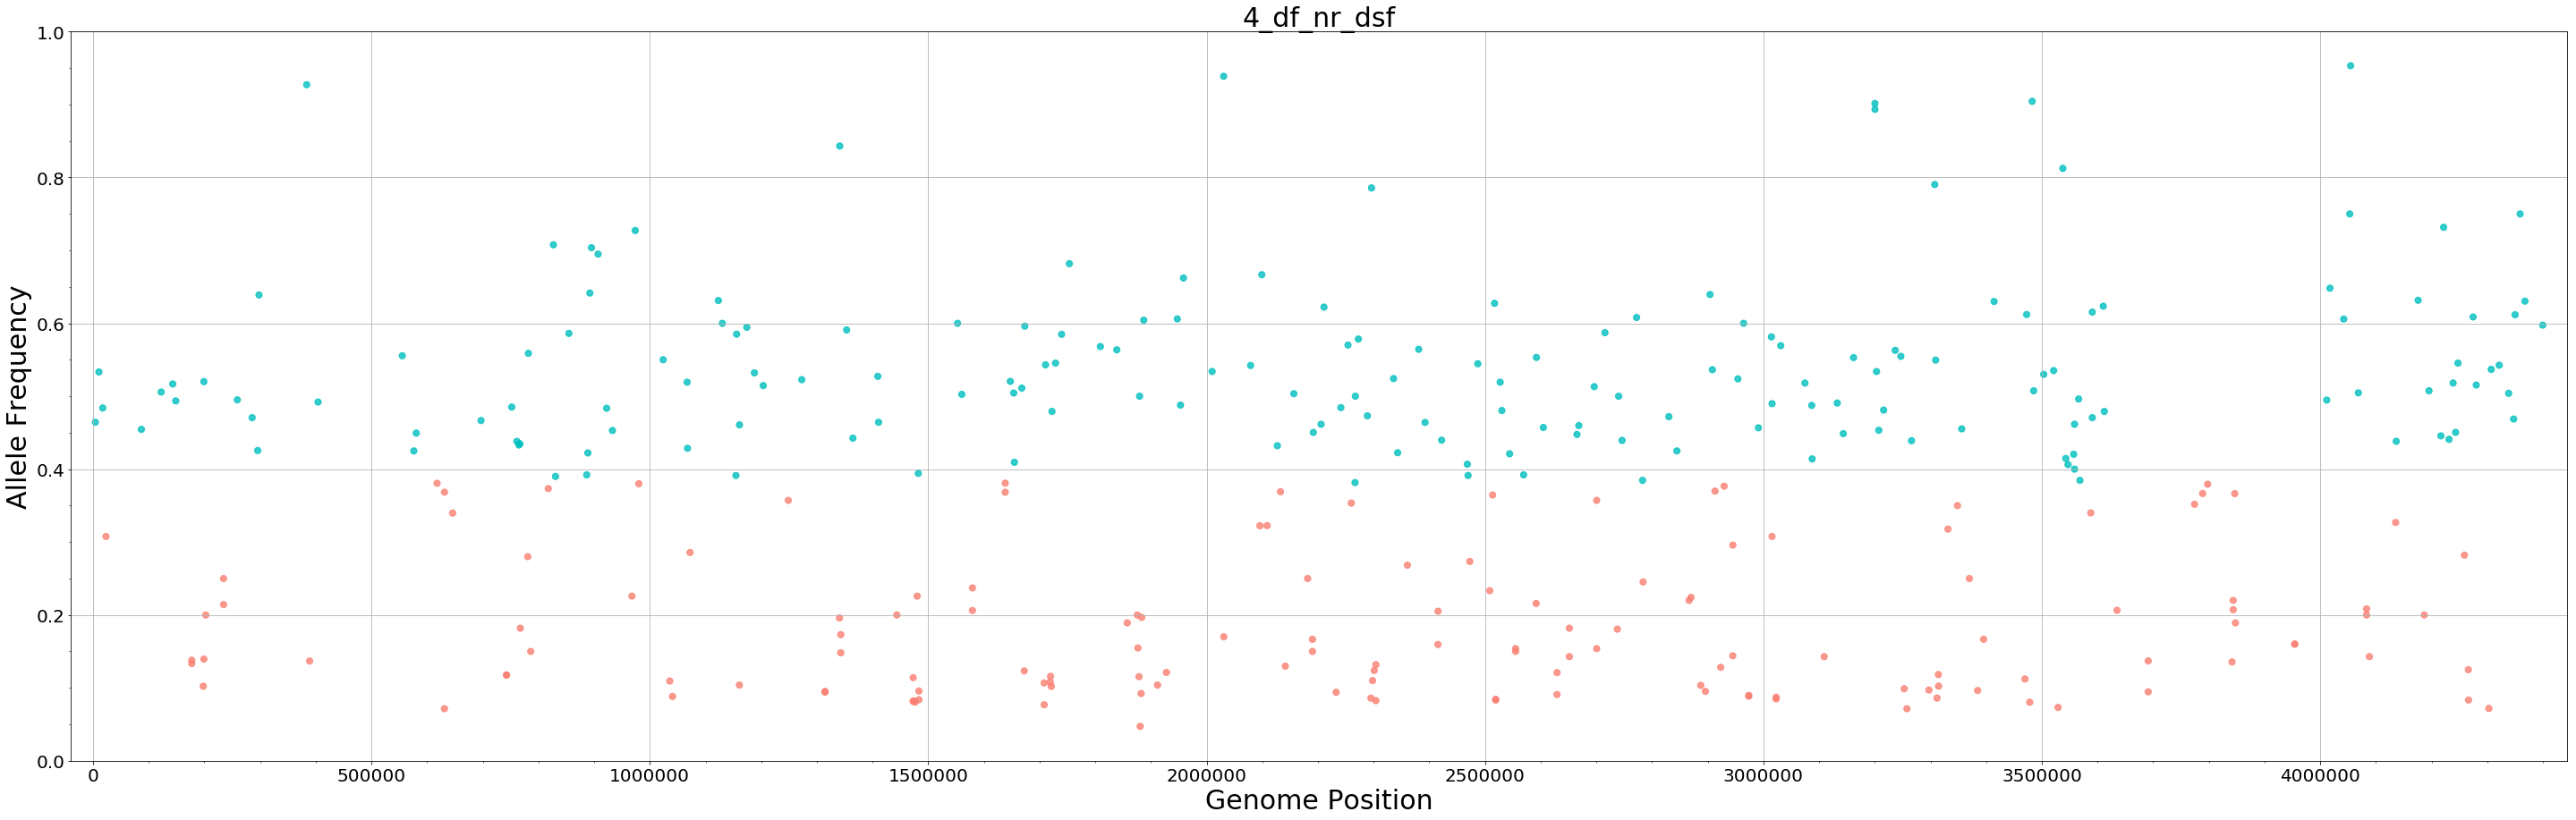

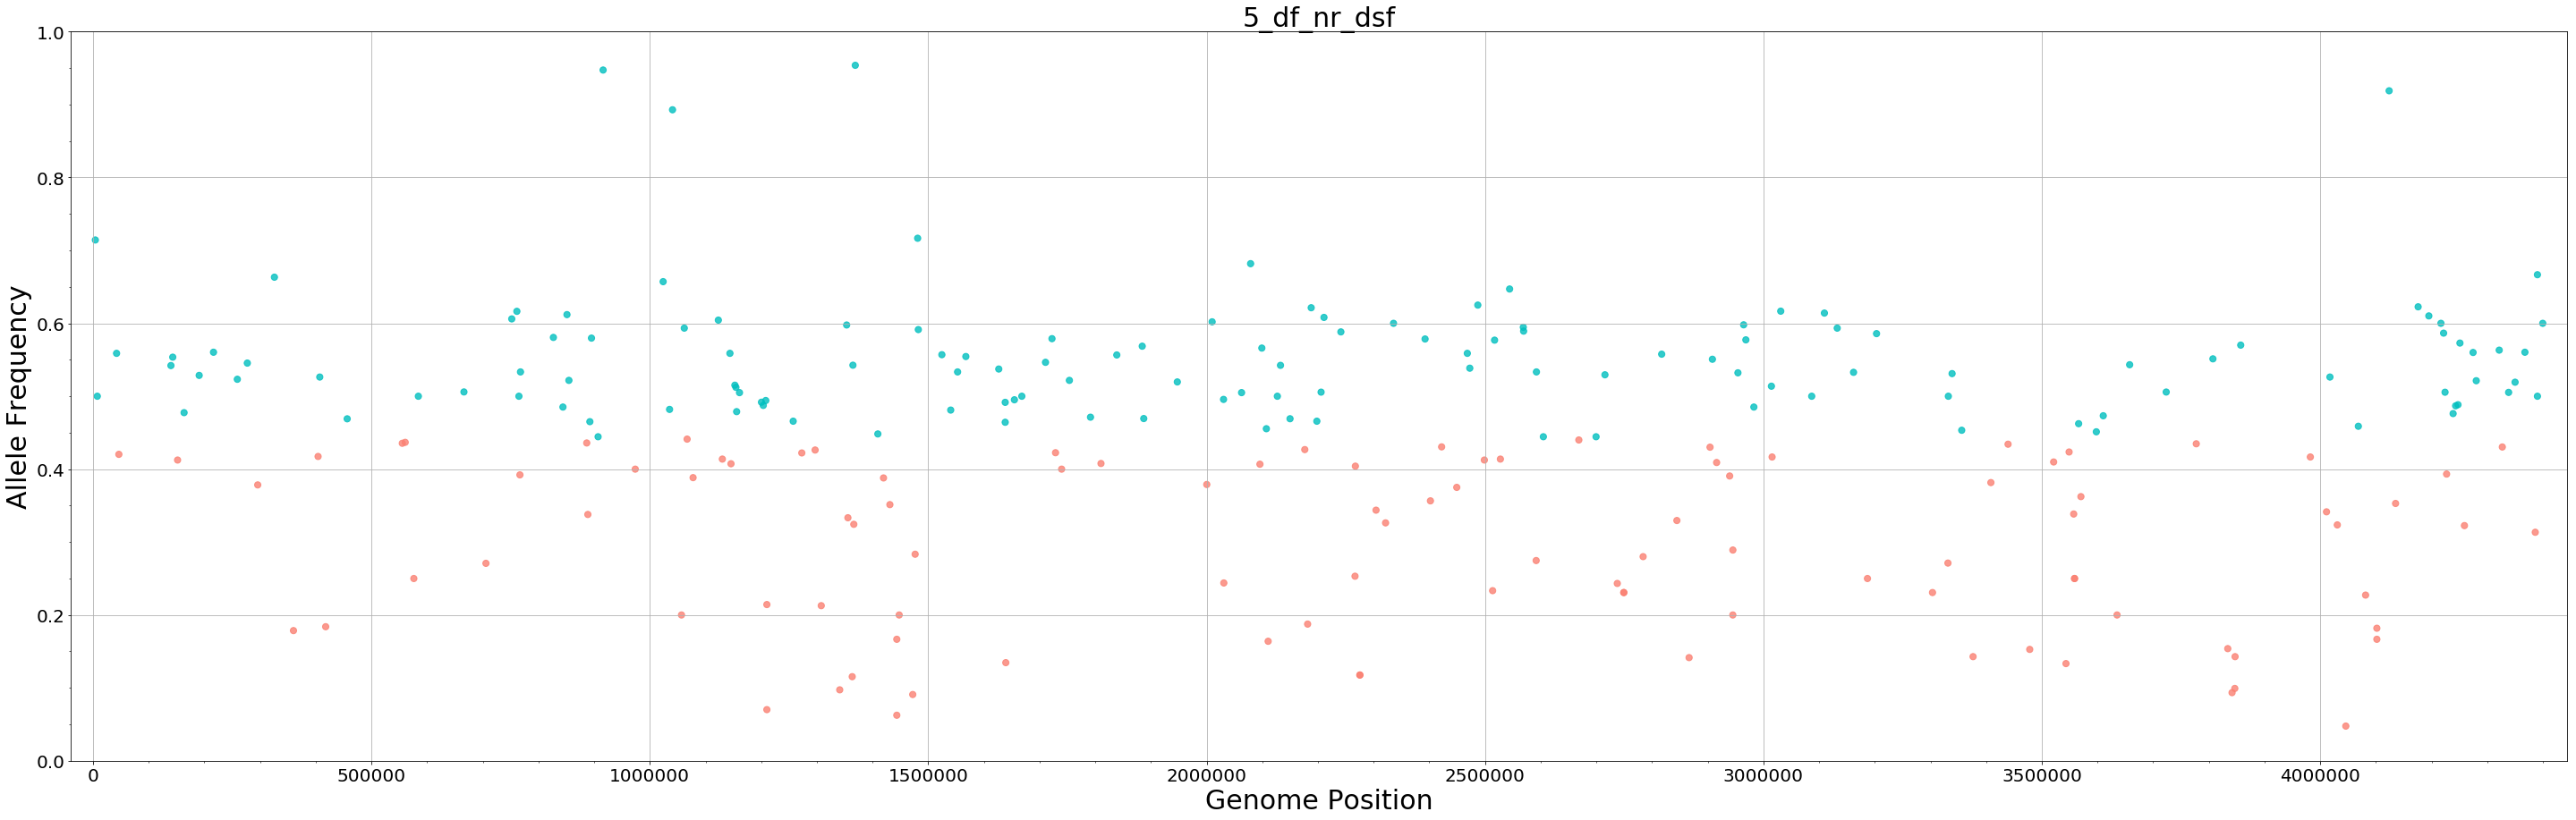

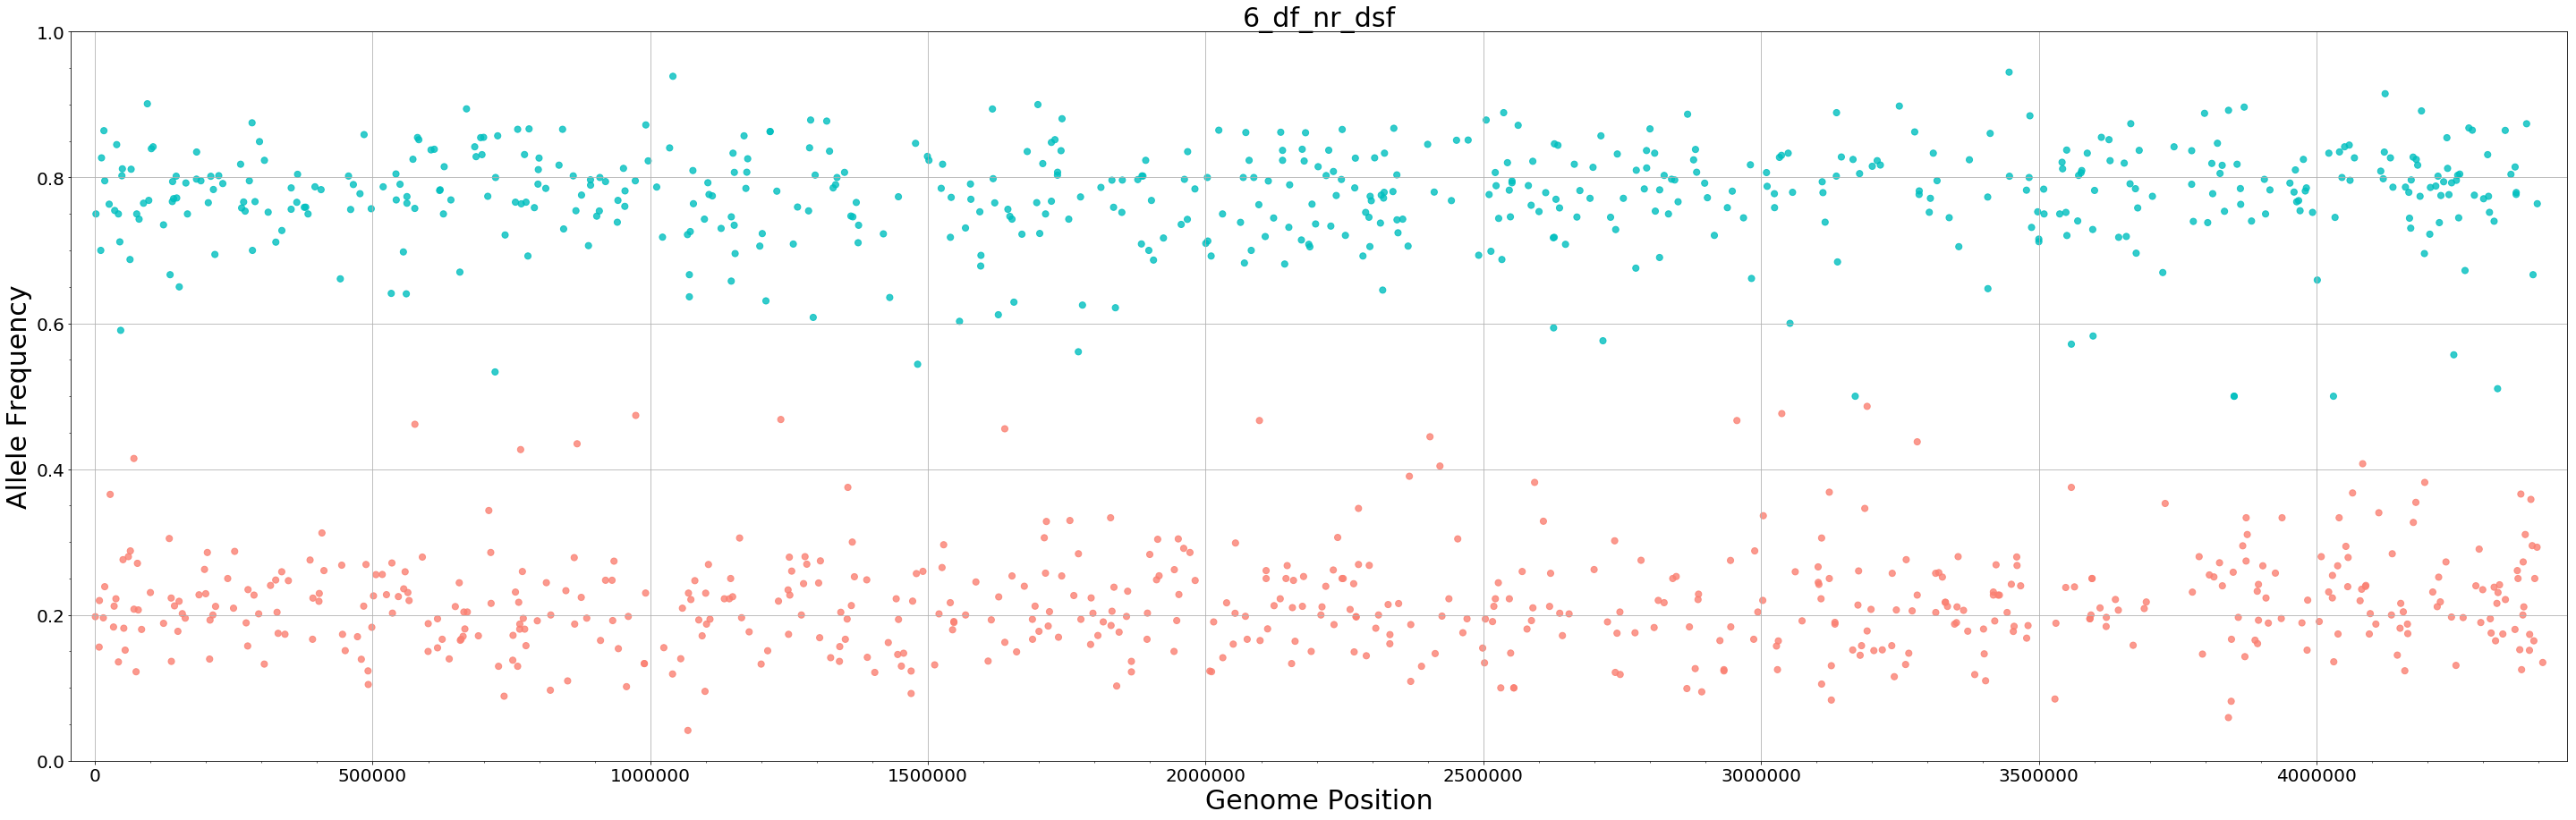

In [184]:
for name_dsf, df_dsf in dict_dsf.items():
    scatter_vcf_pos(df_dsf,name_dsf)

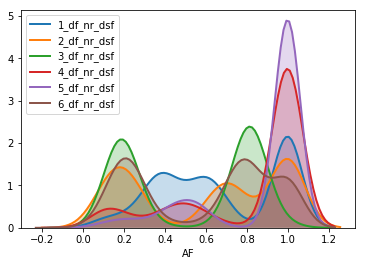

In [185]:
for name_dsf, df_dsf in dict_dsf.items():
    #print(name_dsf)
    x = df_dsf['AF']
    sns.distplot(x, hist=False, kde=True, rug=False, bins=20, kde_kws = {'shade': True, 'linewidth': 2}, label=name_dsf) #stacked=True

<Figure size 3600x1080 with 0 Axes>

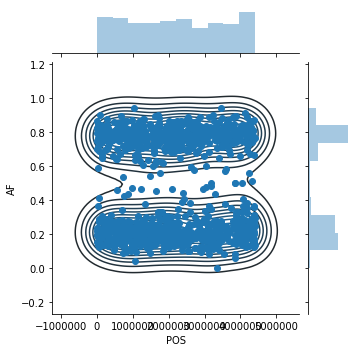

In [139]:
#x = dict_dsf["1_df_nr_dsf"]['AF']
plt.figure(figsize=(50,15))
sns.jointplot(x="POS", y="AF", data=dict_dsf["6_df_nr_dsf"][dict_dsf["6_df_nr_dsf"]['AF'] < 0.95], height=5).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

In [ ]:
vcf_df['AF'] < filter_homoz_top

<Figure size 3600x1080 with 0 Axes>

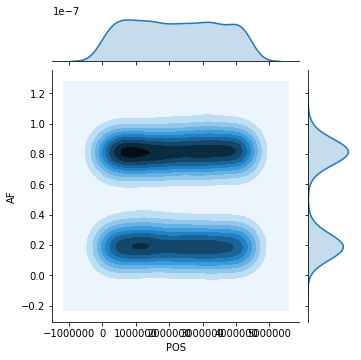

In [140]:
#x = dict_dsf["1_df_nr_dsf"]['AF']
plt.figure(figsize=(50,15))
sns.jointplot(x="POS", y="AF", data=dict_dsf["3_df_nr_dsf"], height=5, kind="kde")

In [191]:
#Function to draw distplot with seaborn
def distplot_sns(data_frame_vcf, name):
    x = data_frame_vcf['AF']
    sns.distplot(x, hist=True, kde=False, rug=False, bins=int(20), vertical=True)
    #plt.legend(prop={'size': 16}, title = name)
    plt.title(name)
    plt.ylabel('Allele Frequency')
    plt.xlabel('Density')
    plt.ylim(0, 1)
    plt.xlim(0, 800)
    name_svg = name + "_den.svg"
    name_png = name + "_den.png"
    #plt.grid(True)
    plt.savefig(os.path.join('img', name_svg), format="svg")
    plt.savefig(os.path.join('img', name_png), format="png")
    plt.show()

In [192]:
#sns.barplot(x="POS", y="AF", data=dict_dsf["3_df_nr_dsf"],
#            label="Total", color="b")

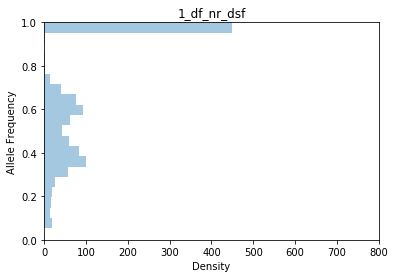

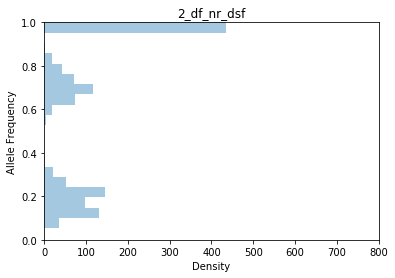

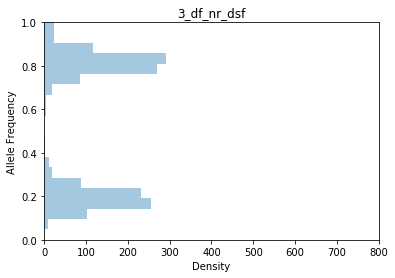

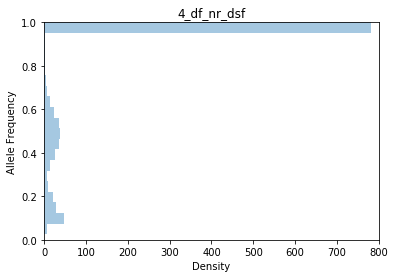

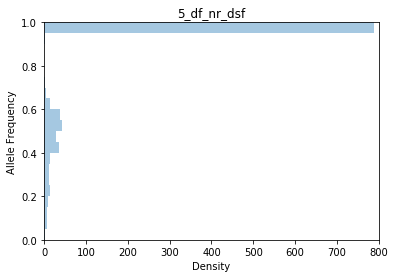

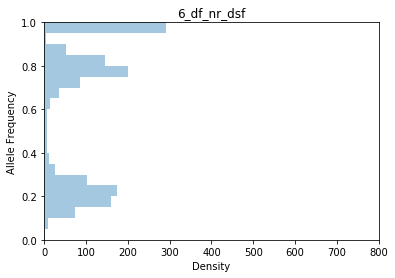

In [193]:
for name_dsf, df_dsf in dict_dsf.items():
    distplot_sns(df_dsf, name_dsf)

# Extract Population Frequency by Allele Frequency

In [110]:
def split_sample_freq(vcf_df, name):
    filter_homoz_top = 0.95
    filter_homoz_bottom = (1 - filter_homoz_top)
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)
    top_positions = vcf_df[(vcf_df['AF'] > mean) & (vcf_df['AF'] < filter_homoz_top)]
    top_positions_mean = top_positions['AF'].mean(axis = 0)
    #bottom_positions = vcf_df[(vcf_df['AF'] < mean) & (vcf_df['AF'] > filter_homoz_bottom)]
    #bottom_positions_mean = bottom_positions['AF'].mean(axis = 0)
    bottom_positions_mean = 1 - top_positions_mean
    print("MIXED SAMPLE: %s: Pop. Freq 1: %.2g, Pop. Freq 2: %.2g" % (name, top_positions_mean, bottom_positions_mean))
    
    return #top_positions_mean, bottom_positions_mean

In [111]:
for name_dsf, df_dsf in dict_dsf.items():
    split_sample_freq(df_dsf, name_dsf)

MIXED SAMPLE: 1_df_nr_dsf: Pop. Freq 1: 0.6, Pop. Freq 2: 0.4
MIXED SAMPLE: 2_df_nr_dsf: Pop. Freq 1: 0.71, Pop. Freq 2: 0.29
MIXED SAMPLE: 3_df_nr_dsf: Pop. Freq 1: 0.81, Pop. Freq 2: 0.19
MIXED SAMPLE: 4_df_nr_dsf: Pop. Freq 1: 0.53, Pop. Freq 2: 0.47
MIXED SAMPLE: 5_df_nr_dsf: Pop. Freq 1: 0.55, Pop. Freq 2: 0.45
MIXED SAMPLE: 6_df_nr_dsf: Pop. Freq 1: 0.77, Pop. Freq 2: 0.23


In [112]:
##################################################################################################################

# Extract position by Allele Frequency

In [155]:
def split_df_mean(vcf_df):
    filter_homoz_top = 0.96
    filter_homoz_bottom = (1 - filter_homoz_top)
    
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)    

    top_positions = vcf_df['POS'][(vcf_df['AF'] > mean) & (vcf_df['AF'] < filter_homoz_top)].tolist()
    bottom_positions = vcf_df['POS'][(vcf_df['AF'] < mean) & (vcf_df['AF'] > filter_homoz_bottom)].tolist()
    
    return top_positions, bottom_positions

# S = Somoza

In [156]:
"""
S_file = "data/SOMOZACOL2_S11_L001__final.bam.snp.final"
S_final = import_to_pandas(S_file)
S_pos = set(S_final.loc[:,0].tolist())
"""

'\nS_file = "data/SOMOZACOL2_S11_L001__final.bam.snp.final"\nS_final = import_to_pandas(S_file)\nS_pos = set(S_final.loc[:,0].tolist())\n'

In [157]:
dict_top_btm = {}
for name_dsf, df_dsf in dict_dsf.items():
    name = name_dsf.split("_")[0]
    name_dict = name + "_top_btm"
    name_top = name + "_top"
    name_btm = name + "_btm"
    name_top , name_btm = split_df_mean(df_dsf)
    dict_top_btm[name_dict] = name_top , name_btm


In [158]:
for key, value in dict_top_btm.items():
    print(key, ":",len(value[0]), len(value[1]))

1_top_btm : 354 375
2_top_btm : 353 486
3_top_btm : 819 724
4_top_btm : 180 144
5_top_btm : 135 103
6_top_btm : 551 573


In [159]:
#Ven diagram with all (non exclusive snps in SOMOZA)
# P50 - 17171479
# P80 - 17160843
# P90 - 17152627
"""
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.title("SOMOZA vs MIX 17160843")
v3 = venn3([top_P180_set, btm_P180_set, S_pos], set_labels = ('TOP', 'BTM', 'SOMOZA'))

plt.subplot(1, 3, 2)
plt.title("SOMOZA vs MIX 17152627")
v = venn3([top_P190_set, btm_P190_set, S_pos], set_labels = ('TOP', 'BTM', 'SOMOZA'), )
#c = venn3_circles([top_P190_set, btm_P190_set, B_exclusive], linestyle='dashed', linewidth=1, color="grey")

plt.subplot(1, 3, 3)
plt.title("SOMOZA vs MIX")
v2 = venn3([top_P150_set, btm_P150_set, S_pos], set_labels = ('TOP', 'BTM', 'SOMOZA'))

plt.suptitle('SOMOZA', fontsize=16, verticalalignment='bottom')

plt.savefig(os.path.join('img', 'SOMOZA_ALL.svg'), format="svg")
#plt.show()
"""

'\nplt.figure(figsize=(20,5))\n\nplt.subplot(1, 3, 1)\nplt.title("SOMOZA vs MIX 17160843")\nv3 = venn3([top_P180_set, btm_P180_set, S_pos], set_labels = (\'TOP\', \'BTM\', \'SOMOZA\'))\n\nplt.subplot(1, 3, 2)\nplt.title("SOMOZA vs MIX 17152627")\nv = venn3([top_P190_set, btm_P190_set, S_pos], set_labels = (\'TOP\', \'BTM\', \'SOMOZA\'), )\n#c = venn3_circles([top_P190_set, btm_P190_set, B_exclusive], linestyle=\'dashed\', linewidth=1, color="grey")\n\nplt.subplot(1, 3, 3)\nplt.title("SOMOZA vs MIX")\nv2 = venn3([top_P150_set, btm_P150_set, S_pos], set_labels = (\'TOP\', \'BTM\', \'SOMOZA\'))\n\nplt.suptitle(\'SOMOZA\', fontsize=16, verticalalignment=\'bottom\')\n\nplt.savefig(os.path.join(\'img\', \'SOMOZA_ALL.svg\'), format="svg")\n#plt.show()\n'

In [161]:
def split_df_mean_todict(vcf_df):
    
    filter_homoz_top = 0.96
    filter_homoz_bottom = (1 - filter_homoz_top)
    
    mean = vcf_df['AF'][(vcf_df['AF'] < filter_homoz_top) & (vcf_df['AF'] > filter_homoz_bottom)].mean(axis = 0)
    
    top_positions_df = vcf_df[(vcf_df['AF'] > mean) & (vcf_df['AF'] < filter_homoz_top)]
    bottom_positions_df = vcf_df[(vcf_df['AF'] < mean) & (vcf_df['AF'] > filter_homoz_bottom)]
    
    top_positions_dict = top_positions_df.set_index('POS')['ALT'].to_dict()
    bottom_positions_dict = bottom_positions_df.set_index('POS')['ALT'].to_dict()

    return top_positions_dict, bottom_positions_dict

In [165]:
dict_allpos_dict = {}
for name_dsf, df_dsf in dict_dsf.items():
    dict_allpos_dict[name_dsf] = df_dsf.set_index('POS')['ALT'].to_dict()

In [167]:
for name_dsf, dict_dsf in dict_allpos_dict.items():
    print(name_dsf)
    get_lineage_coll(dict_dsf)

1_df_nr_dsf
This samples belongs to linage 4
2_df_nr_dsf
This samples belongs to linage 4
3_df_nr_dsf
This samples belongs to linage 4
4_df_nr_dsf
This samples belongs to linage 2.2.1
5_df_nr_dsf
This samples belongs to linage 2.2.1
6_df_nr_dsf
This samples belongs to linage 4


In [162]:
dict_dtop_dbtm = {}
for name_dsf, df_dsf in dict_dsf.items():
    name = name_dsf.split("_")[0]
    name_top = name + "_dtop"
    name_btm = name + "_dbtm"
    
    dict_dtop_dbtm[name_top] = split_df_mean_todict(df_dsf)[0]
    dict_dtop_dbtm[name_btm] = split_df_mean_todict(df_dsf)[1]

In [168]:
for name_dict, dict_value in dict_dtop_dbtm.items():
    print(name_dict)
    get_lineage_coll(dict_value)

1_dtop
This samples belongs to linage unknown
1_dbtm
This samples belongs to linage unknown
2_dtop
This samples belongs to linage unknown
2_dbtm
This samples belongs to linage unknown
3_dtop
This samples belongs to linage 1.2.2
3_dbtm
This samples belongs to linage 4
4_dtop
This samples belongs to linage unknown
4_dbtm
This samples belongs to linage unknown
5_dtop
This samples belongs to linage unknown
5_dbtm
This samples belongs to linage unknown
6_dtop
This samples belongs to linage 2.2.1
6_dbtm
This samples belongs to linage 4


In [169]:
for name_dsf, dict_dsf in dict_allpos_dict.items():
    print(name_dsf)
    get_resistance_snp(dict_dsf)

1_df_nr_dsf
No resistance were found
2_df_nr_dsf
No resistance were found
3_df_nr_dsf
No resistance were found
4_df_nr_dsf
No resistance were found
5_df_nr_dsf
No resistance were found
6_df_nr_dsf
No resistance were found


In [170]:
for name_dict, dict_value in dict_dtop_dbtm.items():
    print(name_dict)
    get_resistance_snp(dict_value)

1_dtop
No resistance were found
1_dbtm
No resistance were found
2_dtop
No resistance were found
2_dbtm
No resistance were found
3_dtop
No resistance were found
3_dbtm
No resistance were found
4_dtop
No resistance were found
4_dbtm
No resistance were found
5_dtop
No resistance were found
5_dbtm
No resistance were found
6_dtop
No resistance were found
6_dbtm
No resistance were found
